# Dynamics of Non-Linear Robotics Systems
## Assignment - 4
written by : Jameel Ahmed Syed
email : j.syed@innopolis.university

# Main Task

<hr>


### Euler - Lagrange Formulation:
```
Contents:
0. Import all the Libraries and Initialize variables
1. Forward Kinematics for the Centre of Mass of the Joint links
    i.e. get the transformation matrices Tc1, Tc2, Tc3, Tc4, Tc5, Tc6
2. Function for Jacobian Matrix using Geometrical Method
3. Calculate the Jacobians for Linear Velocities
4. Calculate the Jaconians for Angular Velocities
5. Get the Rotation Matrices from the Forward Kinematics
6. Initializing the Symbols for Inertia, Mass, Gravity, Velocities
7. Calculate Mass Matrix
8. Calculate Coriolis Matrix
9. Calculate Gravity Matrix
10. Initializing Random values for all the variables
11. Mass Matrix - Numeric
12. Coriolis Matrix - Numeric
13. Gravity Matrix/Vector - Numeric
14. Plot Torques - Euler Lagrange


```

### Newton - Lagrange Formulation:
```
Contents:
0. Get the Rotation matrices
1. Initializing the values for centre distance, centre of mass of link, inertia matrix etc...
2. Forward Recursion
3. Backward Recursion
4. Plot Torques - Newton Euler
```

### Bonus Task
```
Contents:
0. Plot Torques for Trapezoidal Profile
1. Plot Torques for Polynomial Profile
2. Conclusion from the bonus task
```

<hr>


# Part 1: Euler - Lagrange:

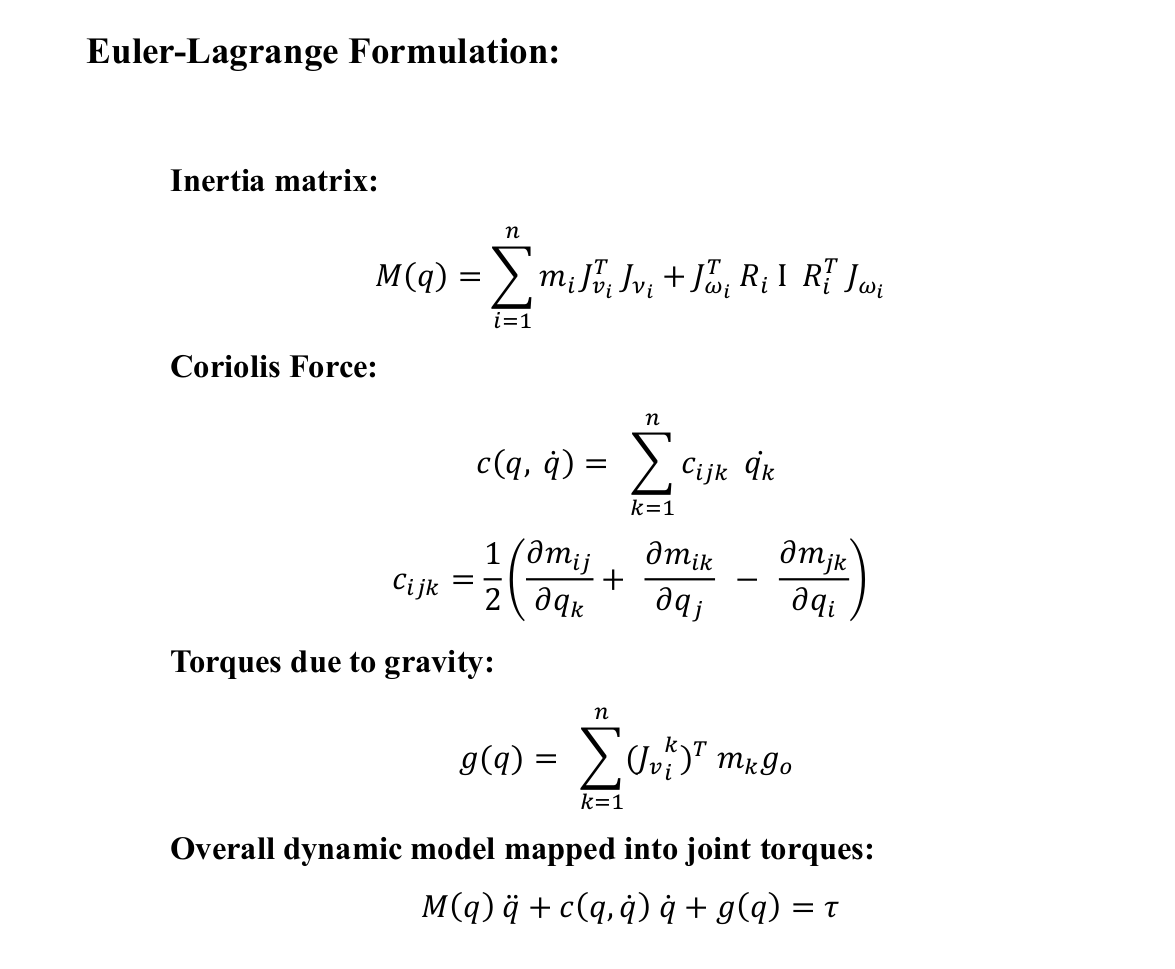

In [92]:
from IPython import display
display.Image("screenshots/euler-lagrange.png")

<hr>

## 0. Import all the Libraries and Initialize variables

In [2]:
import numpy as np
from numpy import pi, cos, sin
from matplotlib.pyplot import *
from SimpleTranformations import print_matrix, setup_symbolic
from sympy import Matrix, diff, zeros, init_printing, trigsimp, nsimplify, symbols

In [3]:
t1 = pi/2  # Joint Angle 1
t2 = pi/2    # Joint Angle 2
t3 = 0      # Dummy variable for just sequence sake
t4 = pi/2   # Joint Angle 4
t5 = pi/2   # Joint Angle 5
t6 = pi/2   # Joint Angle 6

d1 = 0      # Dummy variable for just sequence sake
d2 = 1      # Link 2 Length
d3 = 1      # Prismatic Joint length + the Link 3 Length
d4 = 0      # Dummy variable for just sequence sake
d5 = 0      # Dummy variable for just sequence sake
d6 = 1      # Wrist to the end effector Length

setup_symbolic(symbol=True)

<hr>

## 1. Forward Kinematics to the Centre of Mass of each Joint links
    i.e. get the transformation matrices Tc1, Tc2, Tc3, Tc4, Tc5, Tc6

    for example :   Tc1 = T01
                    Tc2 = T01 * rotx(t2) * tranx(d2/2)

In [4]:
def forward(joint_params, d2, d6, symbolic):
    """Forward Kinematics Solution For Stanford Manipulator
    with Spherical Wrist in any valid euler_wrist arrangement
    :param joint_params: Contains t1, t2, d3, t4, t5, t6 and d3(d3 is not an angle its displacement)
    :param d2: Link 2 length
    :param d6: Link 6 length"""
    if symbolic is False:
        t1, t2, t3, t4, t5, t6 = joint_params
        d2 = d2; d6 = d6
        from SimpleTranformations import rotz, rotx, tranx, tranz

    if symbolic is True:
        from sympy.solvers import solve
        setup_symbolic(symbolic)
        from SimpleTranformations import rotz, rotx, tranx, tranz
        from sympy import symbols
        t1 = symbols('t1')
        t2 = symbols('t2')
        t4 = symbols('t4')
        t5 = symbols('t5')
        t6 = symbols('t6')
        d2 = symbols('d2')
        d3 = symbols('d3')
        d6 = symbols('d6')

    t01 = rotz(t1)               # Rotation around Z axis
    t12 = rotx(t2) * tranx(d2)   # Rotation around Z axis and Translation along X axis
    t23 = tranz(d3)              # Translation along Z axis
    t34 = rotz(t4)               # Rotation around Z axis    #rotz(t4)
    t45 = rotx(t5)               # Rotation around X axis    #rotx(t5)
    t56 = rotz(t6) * tranz(d6)   # Rotation around Z axis and Translation along Z axis
    t36 = t34 * t45 * t56        # Transformation from 3 to 6
    t02 = t01 * t12
    t03 = t02 * t23
    t04 = t03 * t34
    t05 = t04 * t45
    t06 = t05 * t56               # Transformation from 0 to 6
    tc1 = t01
    tc2 = t01 * rotx(t2) * tranx(d2/2)
    tc3 = t02 * tranz(d3/2)
    tc4 = t03 * rotz(t4)
    tc5 = t04 * rotx(t5)
    tc6 = t05 * rotz(t6) * tranz(d6/2)
    p06 = t06[0:3, 3]         # This is the P0 to wrist position using Pipers Method
    return tc1, tc2, tc3, tc4, tc5, tc6, p06

In [5]:
# Forward Kinematics
joint_params = [t1, t2, d3, t4, t5, t6]
tc1, tc2, tc3, tc4, tc5, tc6, p06 = forward(joint_params, d2, d6, symbolic=True)

tc = [tc1, tc2, tc3, tc4, tc5, tc6]

In [6]:
tc1

Matrix([
[cos(t1), -sin(t1), 0, 0],
[sin(t1),  cos(t1), 0, 0],
[      0,        0, 1, 0],
[      0,        0, 0, 1]])

In [7]:
tc2

Matrix([
[cos(t1), -sin(t1)*cos(t2),  sin(t1)*sin(t2), d2*cos(t1)/2],
[sin(t1),  cos(t1)*cos(t2), -sin(t2)*cos(t1), d2*sin(t1)/2],
[      0,          sin(t2),          cos(t2),            0],
[      0,                0,                0,            1]])

In [8]:
tc3

Matrix([
[cos(t1), -sin(t1)*cos(t2),  sin(t1)*sin(t2), d2*cos(t1) + d3*sin(t1)*sin(t2)/2],
[sin(t1),  cos(t1)*cos(t2), -sin(t2)*cos(t1), d2*sin(t1) - d3*sin(t2)*cos(t1)/2],
[      0,          sin(t2),          cos(t2),                      d3*cos(t2)/2],
[      0,                0,                0,                                 1]])

In [9]:
tc4

Matrix([
[-sin(t1)*sin(t4)*cos(t2) + cos(t1)*cos(t4), -sin(t1)*cos(t2)*cos(t4) - sin(t4)*cos(t1),  sin(t1)*sin(t2), d2*cos(t1) + d3*sin(t1)*sin(t2)],
[ sin(t1)*cos(t4) + sin(t4)*cos(t1)*cos(t2), -sin(t1)*sin(t4) + cos(t1)*cos(t2)*cos(t4), -sin(t2)*cos(t1), d2*sin(t1) - d3*sin(t2)*cos(t1)],
[                           sin(t2)*sin(t4),                            sin(t2)*cos(t4),          cos(t2),                      d3*cos(t2)],
[                                         0,                                          0,                0,                               1]])

In [10]:
tc5

Matrix([
[-sin(t1)*sin(t4)*cos(t2) + cos(t1)*cos(t4), (-sin(t1)*cos(t2)*cos(t4) - sin(t4)*cos(t1))*cos(t5) + sin(t1)*sin(t2)*sin(t5), -(-sin(t1)*cos(t2)*cos(t4) - sin(t4)*cos(t1))*sin(t5) + sin(t1)*sin(t2)*cos(t5), d2*cos(t1) + d3*sin(t1)*sin(t2)],
[ sin(t1)*cos(t4) + sin(t4)*cos(t1)*cos(t2), (-sin(t1)*sin(t4) + cos(t1)*cos(t2)*cos(t4))*cos(t5) - sin(t2)*sin(t5)*cos(t1), -(-sin(t1)*sin(t4) + cos(t1)*cos(t2)*cos(t4))*sin(t5) - sin(t2)*cos(t1)*cos(t5), d2*sin(t1) - d3*sin(t2)*cos(t1)],
[                           sin(t2)*sin(t4),                                      sin(t2)*cos(t4)*cos(t5) + sin(t5)*cos(t2),                                      -sin(t2)*sin(t5)*cos(t4) + cos(t2)*cos(t5),                      d3*cos(t2)],
[                                         0,                                                                              0,                                                                               0,                               1]])

In [11]:
tc6

Matrix([
[((-sin(t1)*cos(t2)*cos(t4) - sin(t4)*cos(t1))*cos(t5) + sin(t1)*sin(t2)*sin(t5))*sin(t6) + (-sin(t1)*sin(t4)*cos(t2) + cos(t1)*cos(t4))*cos(t6), ((-sin(t1)*cos(t2)*cos(t4) - sin(t4)*cos(t1))*cos(t5) + sin(t1)*sin(t2)*sin(t5))*cos(t6) - (-sin(t1)*sin(t4)*cos(t2) + cos(t1)*cos(t4))*sin(t6), -(-sin(t1)*cos(t2)*cos(t4) - sin(t4)*cos(t1))*sin(t5) + sin(t1)*sin(t2)*cos(t5), d2*cos(t1) + d3*sin(t1)*sin(t2) + d6*(-(-sin(t1)*cos(t2)*cos(t4) - sin(t4)*cos(t1))*sin(t5) + sin(t1)*sin(t2)*cos(t5))/2],
[ ((-sin(t1)*sin(t4) + cos(t1)*cos(t2)*cos(t4))*cos(t5) - sin(t2)*sin(t5)*cos(t1))*sin(t6) + (sin(t1)*cos(t4) + sin(t4)*cos(t1)*cos(t2))*cos(t6),  ((-sin(t1)*sin(t4) + cos(t1)*cos(t2)*cos(t4))*cos(t5) - sin(t2)*sin(t5)*cos(t1))*cos(t6) - (sin(t1)*cos(t4) + sin(t4)*cos(t1)*cos(t2))*sin(t6), -(-sin(t1)*sin(t4) + cos(t1)*cos(t2)*cos(t4))*sin(t5) - sin(t2)*cos(t1)*cos(t5), d2*sin(t1) - d3*sin(t2)*cos(t1) + d6*(-(-sin(t1)*sin(t4) + cos(t1)*cos(t2)*cos(t4))*sin(t5) - sin(t2)*cos(t1)*cos(t5))/2],
[

<hr>

## 2. Function for Jacobian Matrix using Geometrical Method

In [12]:
def jacobian_geometrical(t01, t02, t03, t04, t05, p06):
    """Returns the Jacobian Matrix from the Forward kinematics Geometrically"""
    j = ['j1', 'j2', 'j3', 'j4', 'j5', 'j6']

    for var in j:
        globals()[var] = Matrix([[0], [0], [0], [0], [0], [0]])

    z0 = Matrix([[0], [0], [1]])
    p0 = Matrix([[0], [0], [0]])
    j1 = z0.cross((tc1[0:3, 3]-p0)).row_insert(3, z0)
    j2 = tc1[0:3, 0].cross((tc2[0:3, 3]-tc1[0:3, 3])).row_insert(3, tc1[0:3, 0])
    j3 = tc2[0:3, 2].row_insert(3, Matrix([[0], [0], [0]]))
    j4 = tc3[0:3, 2].cross((tc4[0:3, 3]-tc3[0:3, 3])).row_insert(3, tc3[0:3, 2])
    j5 = tc4[0:3, 0].cross((tc5[0:3, 3]-tc4[0:3, 3])).row_insert(3, tc4[0:3, 0])
    j6 = tc5[0:3, 2].cross((tc6[0:3, 3]-tc5[0:3, 3])).row_insert(3, tc5[0:3, 2])

    cols = [j1, j2, j3, j4, j5, j6]

    J = Matrix([])
    for j in range(len(cols)):
        J = J.col_insert(j, cols[j])

    return J

In [13]:
# All of these are Symbols of Joint coordinates
t1 = symbols('t1')
t2 = symbols('t2')
d3 = symbols('d3')
t4 = symbols('t4')
t5 = symbols('t5')
t6 = symbols('t6')
d2 = symbols('d2')
d6 = symbols('d6')
joints_symbols = [t1, t2, d3, t4, t5, t6]
init_printing(wrap_line=False, use_unicode=True)

<hr>

## 3. Calculate the Jacobians for Linear Velocities

In [14]:
# Calculate the linear velocity jacobians 3*6 matrix
def get_linear_velocity_jacobian(tc):
    jvs = [[]] * len(tc)
    jv_mat = zeros(3, 6)
    for j in range(len(tc)):
        for i in range(len(joints_symbols)):
            for x in range(3):
                jv_mat[x, i] = diff(tc[j][x, 3], joints_symbols[i])
        jvs[j] = Matrix(jv_mat)
        #print_matrix(jv_mat, name_matrix=f"Jv{j+1} Matrix")
    return jvs

In [15]:
jv_mats = get_linear_velocity_jacobian([tc1, tc2, tc3, tc4, tc5, tc6])
jv1, jv2, jv3, jv4, jv5, jv6 = jv_mats

In [16]:
jv1

⎡0  0  0  0  0  0⎤
⎢                ⎥
⎢0  0  0  0  0  0⎥
⎢                ⎥
⎣0  0  0  0  0  0⎦

In [17]:
jv2

⎡-d₂⋅sin(t₁)                ⎤
⎢────────────  0  0  0  0  0⎥
⎢     2                     ⎥
⎢                           ⎥
⎢ d₂⋅cos(t₁)                ⎥
⎢ ──────────   0  0  0  0  0⎥
⎢     2                     ⎥
⎢                           ⎥
⎣     0        0  0  0  0  0⎦

In [18]:
jv3

⎡              d₃⋅sin(t₂)⋅cos(t₁)   d₃⋅sin(t₁)⋅cos(t₂)    sin(t₁)⋅sin(t₂)          ⎤
⎢-d₂⋅sin(t₁) + ──────────────────   ──────────────────    ───────────────   0  0  0⎥
⎢                      2                    2                    2                 ⎥
⎢                                                                                  ⎥
⎢             d₃⋅sin(t₁)⋅sin(t₂)   -d₃⋅cos(t₁)⋅cos(t₂)   -sin(t₂)⋅cos(t₁)          ⎥
⎢d₂⋅cos(t₁) + ──────────────────   ────────────────────  ─────────────────  0  0  0⎥
⎢                     2                     2                    2                 ⎥
⎢                                                                                  ⎥
⎢                                      -d₃⋅sin(t₂)            cos(t₂)              ⎥
⎢               0                      ────────────           ───────       0  0  0⎥
⎣                                           2                    2                 ⎦

In [19]:
jv4

⎡-d₂⋅sin(t₁) + d₃⋅sin(t₂)⋅cos(t₁)  d₃⋅sin(t₁)⋅cos(t₂)   sin(t₁)⋅sin(t₂)   0  0  0⎤
⎢                                                                                ⎥
⎢d₂⋅cos(t₁) + d₃⋅sin(t₁)⋅sin(t₂)   -d₃⋅cos(t₁)⋅cos(t₂)  -sin(t₂)⋅cos(t₁)  0  0  0⎥
⎢                                                                                ⎥
⎣               0                      -d₃⋅sin(t₂)          cos(t₂)       0  0  0⎦

In [20]:
jv5

⎡-d₂⋅sin(t₁) + d₃⋅sin(t₂)⋅cos(t₁)  d₃⋅sin(t₁)⋅cos(t₂)   sin(t₁)⋅sin(t₂)   0  0  0⎤
⎢                                                                                ⎥
⎢d₂⋅cos(t₁) + d₃⋅sin(t₁)⋅sin(t₂)   -d₃⋅cos(t₁)⋅cos(t₂)  -sin(t₂)⋅cos(t₁)  0  0  0⎥
⎢                                                                                ⎥
⎣               0                      -d₃⋅sin(t₂)          cos(t₂)       0  0  0⎦

In [21]:
jv6

⎡                                   d₆⋅(-(sin(t₁)⋅sin(t₄) - cos(t₁)⋅cos(t₂)⋅cos(t₄))⋅sin(t₅) + sin(t₂)⋅cos(t₁)⋅cos(t₅))                       d₆⋅(-sin(t₁)⋅sin(t₂)⋅sin(t₅)⋅cos(t₄) + sin(t₁)⋅cos(t₂)⋅cos(t₅))                    -d₆⋅(sin(t₁)⋅sin(t₄)⋅cos(t₂) - cos(t₁)⋅cos(t₄))⋅sin(t₅)    d₆⋅(-(-sin(t₁)⋅cos(t₂)⋅cos(t₄) - sin(t₄)⋅cos(t₁))⋅cos(t₅) - sin(t₁)⋅sin(t₂)⋅sin(t₅))   ⎤
⎢-d₂⋅sin(t₁) + d₃⋅sin(t₂)⋅cos(t₁) + ───────────────────────────────────────────────────────────────────────────────────  d₃⋅sin(t₁)⋅cos(t₂) + ───────────────────────────────────────────────────────────────  sin(t₁)⋅sin(t₂)   ────────────────────────────────────────────────────────   ────────────────────────────────────────────────────────────────────────────────────  0⎥
⎢                                                                            2                                                                                               2                                                                              2 

<hr>

## 4. Calculate the Jacobians for Angular Velocities

In [22]:
# Get angular velocity jacobians 3*6 (it is the last 3 rows of each jacobian)
def get_angular_velocity_jacobians(tc):
    J = jacobian_geometrical(tc1, tc2, tc3, tc4, tc5, p06)
    jw1 = Matrix()
    jw1 = jw1.col_insert(0, J[3:, 0])
    jw2 = jw1.col_insert(1, J[3:, 1])
    jw3 = jw2.col_insert(2, J[3:, 2])
    jw4 = jw3.col_insert(3, J[3:, 3])
    jw5 = jw4.col_insert(4, J[3:, 4])
    jw6 = jw5.col_insert(5, J[3:, 5])
    jw1 = jw1.col_insert(1, zeros(3, 5))
    jw2 = jw2.col_insert(2, zeros(3, 4))
    jw3 = jw3.col_insert(3, zeros(3, 3))
    jw4 = jw4.col_insert(4, zeros(3, 2))
    jw5 = jw5.col_insert(5, zeros(3, 1))
    jws = [jw1, jw2, jw3, jw4, jw5, jw6]
    #for i in range(len(jws)):
    #    print_matrix(jws[i], name_matrix=f"Jw{i+1} Matrix")
    return jws

In [23]:
jw_mats = get_angular_velocity_jacobians([tc1, tc2, tc3, tc4, tc5, tc6])
jw1, jw2, jw3, jw4, jw5, jw6 = jw_mats

In [24]:
jw1

⎡0  0  0  0  0  0⎤
⎢                ⎥
⎢0  0  0  0  0  0⎥
⎢                ⎥
⎣1  0  0  0  0  0⎦

In [25]:
jw2

⎡0  cos(t₁)  0  0  0  0⎤
⎢                      ⎥
⎢0  sin(t₁)  0  0  0  0⎥
⎢                      ⎥
⎣1     0     0  0  0  0⎦

In [26]:
jw3

⎡0  cos(t₁)  0  0  0  0⎤
⎢                      ⎥
⎢0  sin(t₁)  0  0  0  0⎥
⎢                      ⎥
⎣1     0     0  0  0  0⎦

In [27]:
jw4

⎡0  cos(t₁)  0  sin(t₁)⋅sin(t₂)   0  0⎤
⎢                                     ⎥
⎢0  sin(t₁)  0  -sin(t₂)⋅cos(t₁)  0  0⎥
⎢                                     ⎥
⎣1     0     0      cos(t₂)       0  0⎦

In [28]:
jw5

⎡0  cos(t₁)  0  sin(t₁)⋅sin(t₂)   -sin(t₁)⋅sin(t₄)⋅cos(t₂) + cos(t₁)⋅cos(t₄)  0⎤
⎢                                                                              ⎥
⎢0  sin(t₁)  0  -sin(t₂)⋅cos(t₁)  sin(t₁)⋅cos(t₄) + sin(t₄)⋅cos(t₁)⋅cos(t₂)   0⎥
⎢                                                                              ⎥
⎣1     0     0      cos(t₂)                    sin(t₂)⋅sin(t₄)                0⎦

In [29]:
jw6

⎡0  cos(t₁)  0  sin(t₁)⋅sin(t₂)   -sin(t₁)⋅sin(t₄)⋅cos(t₂) + cos(t₁)⋅cos(t₄)  -(-sin(t₁)⋅cos(t₂)⋅cos(t₄) - sin(t₄)⋅cos(t₁))⋅sin(t₅) + sin(t₁)⋅sin(t₂)⋅cos(t₅)⎤
⎢                                                                                                                                                            ⎥
⎢0  sin(t₁)  0  -sin(t₂)⋅cos(t₁)  sin(t₁)⋅cos(t₄) + sin(t₄)⋅cos(t₁)⋅cos(t₂)   -(-sin(t₁)⋅sin(t₄) + cos(t₁)⋅cos(t₂)⋅cos(t₄))⋅sin(t₅) - sin(t₂)⋅cos(t₁)⋅cos(t₅)⎥
⎢                                                                                                                                                            ⎥
⎣1     0     0      cos(t₂)                    sin(t₂)⋅sin(t₄)                                  -sin(t₂)⋅sin(t₅)⋅cos(t₄) + cos(t₂)⋅cos(t₅)                   ⎦

<hr>

## 5. Get the Rotation Matrices from the Forward Kinematics

In [30]:
# Get the rotation matrices from the forward kinematics
R1 = tc1[0:3, 0:3]
R2 = tc2[0:3, 0:3]
R3 = tc3[0:3, 0:3]
R4 = tc4[0:3, 0:3]
R5 = tc5[0:3, 0:3]
R6 = tc6[0:3, 0:3]
R = [R1, R2, R3, R4, R5, R6]
#for i in range(len(R)):
#    print_matrix(R[i], name_matrix=f"R{i+1} Matrix")

In [31]:
R1      # Rotation Matrix of Tc1

⎡cos(t₁)  -sin(t₁)  0⎤
⎢                    ⎥
⎢sin(t₁)  cos(t₁)   0⎥
⎢                    ⎥
⎣   0        0      1⎦

In [32]:
R2      # Rotation Matrix of Tc2

⎡cos(t₁)  -sin(t₁)⋅cos(t₂)  sin(t₁)⋅sin(t₂) ⎤
⎢                                           ⎥
⎢sin(t₁)  cos(t₁)⋅cos(t₂)   -sin(t₂)⋅cos(t₁)⎥
⎢                                           ⎥
⎣   0         sin(t₂)           cos(t₂)     ⎦

In [33]:
R3      # Rotation Matrix of Tc3

⎡cos(t₁)  -sin(t₁)⋅cos(t₂)  sin(t₁)⋅sin(t₂) ⎤
⎢                                           ⎥
⎢sin(t₁)  cos(t₁)⋅cos(t₂)   -sin(t₂)⋅cos(t₁)⎥
⎢                                           ⎥
⎣   0         sin(t₂)           cos(t₂)     ⎦

In [34]:
R4      # Rotation Matrix of Tc4

⎡-sin(t₁)⋅sin(t₄)⋅cos(t₂) + cos(t₁)⋅cos(t₄)  -sin(t₁)⋅cos(t₂)⋅cos(t₄) - sin(t₄)⋅cos(t₁)  sin(t₁)⋅sin(t₂) ⎤
⎢                                                                                                        ⎥
⎢sin(t₁)⋅cos(t₄) + sin(t₄)⋅cos(t₁)⋅cos(t₂)   -sin(t₁)⋅sin(t₄) + cos(t₁)⋅cos(t₂)⋅cos(t₄)  -sin(t₂)⋅cos(t₁)⎥
⎢                                                                                                        ⎥
⎣             sin(t₂)⋅sin(t₄)                             sin(t₂)⋅cos(t₄)                    cos(t₂)     ⎦

In [35]:
R5      # Rotation Matrix of Tc5

⎡-sin(t₁)⋅sin(t₄)⋅cos(t₂) + cos(t₁)⋅cos(t₄)  (-sin(t₁)⋅cos(t₂)⋅cos(t₄) - sin(t₄)⋅cos(t₁))⋅cos(t₅) + sin(t₁)⋅sin(t₂)⋅sin(t₅)  -(-sin(t₁)⋅cos(t₂)⋅cos(t₄) - sin(t₄)⋅cos(t₁))⋅sin(t₅) + sin(t₁)⋅sin(t₂)⋅cos(t₅)⎤
⎢                                                                                                                                                                                                           ⎥
⎢sin(t₁)⋅cos(t₄) + sin(t₄)⋅cos(t₁)⋅cos(t₂)   (-sin(t₁)⋅sin(t₄) + cos(t₁)⋅cos(t₂)⋅cos(t₄))⋅cos(t₅) - sin(t₂)⋅sin(t₅)⋅cos(t₁)  -(-sin(t₁)⋅sin(t₄) + cos(t₁)⋅cos(t₂)⋅cos(t₄))⋅sin(t₅) - sin(t₂)⋅cos(t₁)⋅cos(t₅)⎥
⎢                                                                                                                                                                                                           ⎥
⎣             sin(t₂)⋅sin(t₄)                                  sin(t₂)⋅cos(t₄)⋅cos(t₅) + sin(t₅)⋅cos(t₂)                                       -sin(t₂)⋅sin(t₅)⋅cos(t₄) + cos(t₂

In [36]:
R6      # Rotation Matrix of Tc6

⎡((-sin(t₁)⋅cos(t₂)⋅cos(t₄) - sin(t₄)⋅cos(t₁))⋅cos(t₅) + sin(t₁)⋅sin(t₂)⋅sin(t₅))⋅sin(t₆) + (-sin(t₁)⋅sin(t₄)⋅cos(t₂) + cos(t₁)⋅cos(t₄))⋅cos(t₆)  ((-sin(t₁)⋅cos(t₂)⋅cos(t₄) - sin(t₄)⋅cos(t₁))⋅cos(t₅) + sin(t₁)⋅sin(t₂)⋅sin(t₅))⋅cos(t₆) - (-sin(t₁)⋅sin(t₄)⋅cos(t₂) + cos(t₁)⋅cos(t₄))⋅sin(t₆)  -(-sin(t₁)⋅cos(t₂)⋅cos(t₄) - sin(t₄)⋅cos(t₁))⋅sin(t₅) + sin(t₁)⋅sin(t₂)⋅cos(t₅)⎤
⎢                                                                                                                                                                                                                                                                                                                                                                                 ⎥
⎢((-sin(t₁)⋅sin(t₄) + cos(t₁)⋅cos(t₂)⋅cos(t₄))⋅cos(t₅) - sin(t₂)⋅sin(t₅)⋅cos(t₁))⋅sin(t₆) + (sin(t₁)⋅cos(t₄) + sin(t₄)⋅cos(t₁)⋅cos(t₂))⋅cos(t₆)   ((-sin(t₁)⋅sin(t₄) + cos(t₁)⋅cos(t₂)⋅cos(t₄))⋅cos(t₅) - sin(t₂)⋅sin(t₅)⋅cos(t₁))⋅cos(t₆) - (sin(t₁)⋅cos(t₄) + 

<hr>

## 6. Initializing the Symbols for Inertia, Mass, Gravity, Velocities

In [37]:
# Symbols for Inertia Matrix
ixx = symbols('ixx')
ixy = symbols('ixy')
ixz = symbols('ixz')
iyx = symbols('iyx')
iyy = symbols('iyy')
iyz = symbols('iyz')
izx = symbols('izx')
izy = symbols('izy')
izz = symbols('izz')

# Symbols for Mass of each link
m1 = symbols('m1')
m2 = symbols('m2')
m3 = symbols('m3')
m4 = symbols('m4')
m5 = symbols('m5')
m6 = symbols('m6')
m = [m1, m2, m3, m4, m5, m6]

# Velocities of each joints
dt1 = symbols('dt1')
dt2 = symbols('dt2')
dt3 = symbols('dt3')
dt4 = symbols('dt4')
dt5 = symbols('dt5')
dt6 = symbols('dt6')
dt = [dt1, dt2, dt3, dt4, dt5, dt6]

# Acceleration due to gravity
g0 = Matrix([[0],[0],[-9.81]])

# Inertia Matrix
I = Matrix([[ixx, 0, 0],
            [0, iyy, 0],
            [0, 0, izz]])

<hr>

## 7. Calculate Mass Matrix



In [38]:
# Calculate the Mass Matrix 6*6 Matrix
def get_the_mass_matrix():
    """Calculates the Mass Matrix"""
    M = zeros(6, 6)
    m_mats = [[]] * len(tc)
    for i in range(len(tc)):
        m_mats[i] = m[i]*jv_mats[i].T*jv_mats[i] + jw_mats[i].T*R[i]*I*R[i].T*jw_mats[i]
        M += m_mats[i]
    return M

In [39]:
M = get_the_mass_matrix()

In [40]:
print("Mass Matrix = ")
M

Mass Matrix = 


⎡                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       

<hr>

## 8. Calculate Coriolis Matrix

In [41]:
def cijk(i, j, k):
    """Calculates Cijk terms for each i, j, k"""
    return 0.5 *(diff(M[i,j], joints_symbols[k]) + diff(M[i,k], joints_symbols[j]) - diff(M[j,k], joints_symbols[i]))

In [42]:
# Calculate Coriolis Matrix
def get_coriolis_matrix():
    """Calculates the Coriolis Matrix"""
    C = zeros(6, 6)
    for i in range(len(tc)):
        for j in range(len(tc)):
            for k in range(len(tc)):
                C[i,j] += cijk(i, j, k)*dt[k]
    return C

In [43]:
C = get_coriolis_matrix()
#print_matrix(C, name_matrix="Coriolis Matrix")

<hr>

## 9. Calculate Gravity Matrix

In [44]:
# Calculate Torque due Gravity Matrix
def get_gravity_matrix():
    G = Matrix([[0],
                [0],
                [0],
                [0],
                [0],
                [0]])
    for i in range(len(tc)):
        G[i, 0] = (-jv_mats[0][:,i].T *m[0] -jv_mats[1][:,i].T*m[1] -jv_mats[2][:,i].T*m[2] -jv_mats[3][:,i].T*m[3] -jv_mats[4][:,i].T*m[4] -jv_mats[5][:,i].T*m[5]) * g0
        #print_matrix(jv_mats[k][:,i].T * m[k] * g0)
    return G

In [45]:
G = get_gravity_matrix()

In [46]:
#print("G Matrix = ")
#G

In [47]:
# Joint Velocities
dt1 = symbols('dt1')
dt2 = symbols('dt2')
dt3 = symbols('dt3')
dt4 = symbols('dt4')
dt5 = symbols('dt5')
dt6 = symbols('dt6')
dt = Matrix([[dt1], [dt2], [dt3], [dt4], [dt5], [dt6]])

# Joint Accelerations
ddt1 = symbols('ddt1')
ddt2 = symbols('ddt2')
ddt3 = symbols('ddt3')
ddt4 = symbols('ddt4')
ddt5 = symbols('ddt5')
ddt6 = symbols('ddt6')
ddt = Matrix([[ddt1], [ddt2], [ddt3], [ddt4], [ddt5], [ddt6]])

In [48]:
M_ddt = M * ddt

In [49]:
C_dt = C * dt

<hr>

## 10. Initializing values for all the variables

In [50]:
t1 = pi/2
t2 = pi/2
d3 = 1
t4 = pi/2
t5 = pi/2
t6 = pi/2
d2 = 1
d6 = 1
ixx = 1; ixy = 0  ; ixz = 0
iyx = 0  ; iyy = 1; iyz = 0
izx = 0  ; izy = 0  ; izz = 1
m1 = 0.1
m2 = 0.1
m3 = 0.1
m4 = 0.1
m5 = 0.1
m6 = 0.1

# Joint Velocities
dt1 = 0.1
dt2 = 0.1
dt3 = 0.1
dt4 = 0.1
dt5 = 0.1
dt6 = 0.1
dt = Matrix([[dt1], [dt2], [dt3], [dt4], [dt5], [dt6]])

# Joint Accelerations
ddt1 = 0.1
ddt2 = 0.1
ddt3 = 0.1
ddt4 = 0.1
ddt5 = 0.1
ddt6 = 0.1
ddt = Matrix([[ddt1], [ddt2], [ddt3], [ddt4], [ddt5], [ddt6]])


<hr>

## 11. Mass Matrix

In [51]:
M_ = eval(f"{M}")
M_ = nsimplify(M_, tolerance=1e-10, rational=True)
#print_matrix(M_, name_matrix="M Matrix")

In [52]:
print("M Matrix = ")
M_

M Matrix = 


⎡                            83     ⎤
⎢55/8    0    -2/5     0     ──    0⎥
⎢                            40     ⎥
⎢                                   ⎥
⎢       213                         ⎥
⎢ 0     ───     0    -1/20    0    1⎥
⎢        40                         ⎥
⎢                                   ⎥
⎢              13                   ⎥
⎢-2/5    0     ──      0    -1/20  0⎥
⎢              40                   ⎥
⎢                                   ⎥
⎢                     121           ⎥
⎢ 0    -1/20    0     ───     0    0⎥
⎢                      40           ⎥
⎢                                   ⎥
⎢ 83                         81     ⎥
⎢ ──     0    -1/20    0     ──    0⎥
⎢ 40                         40     ⎥
⎢                                   ⎥
⎣ 0      1      0      0      0    1⎦

#### 11b. Torque due to Mass Matrix
        i.e. M_torque = M * ddt  (6x1 Matrix)

In [53]:
M_torque = eval(f"{M_*ddt}")
#print_matrix(M_torque, name_matrix="M*ddt Matrix")

In [54]:
print("M*ddt Matrix = ")
M_torque

M*ddt Matrix = 


⎡ 0.855 ⎤
⎢       ⎥
⎢0.6275 ⎥
⎢       ⎥
⎢-0.0125⎥
⎢       ⎥
⎢0.2975 ⎥
⎢       ⎥
⎢ 0.405 ⎥
⎢       ⎥
⎣  0.2  ⎦

<hr>

## 12. Coriolis Matrix

In [55]:
C_ = eval(f"{C}")
print_matrix(eval(f"{C_}"), name_matrix="C Matrix")

C Matrix =
0.0275000000000000 	-0.117500000000000  	0.0325000000000000  	-0.112500000000000   	-0.00999999999999999 	0.0500000000000000   
0.150000000000000  	0.0275000000000000  	0.0325000000000000  	0.0500000000000000   	-0.105000000000000   	9.18485099360515e-18 
-0.0325000000000000	-0.0275000000000000 	0                   	0.00500000000000000  	-6.12323399573677e-19	0                    
-0.200000000000000 	-0.0525000000000000 	-0.00500000000000000	1.53080849893417e-19 	0.0525000000000000   	-0.100000000000000   
0.00500000000000002	-0.0975000000000000 	3.06161699786838e-19	-0.0525000000000000  	-9.37349864163658e-36	0.0500000000000000   
0.0500000000000000 	3.06161699786838e-18	0                   	-1.23259516440783e-33	-0.0500000000000000  	-8.57655218742367e-34 



In [56]:
print("C Matrix = ")
C_

C Matrix = 


⎡      0.0275               -0.1175                0.0325                -0.1125         -0.00999999999999999           0.05         ⎤
⎢                                                                                                                                    ⎥
⎢       0.15                 0.0275                0.0325                 0.05                  -0.105          9.18485099360515e-18 ⎥
⎢                                                                                                                                    ⎥
⎢      -0.0325              -0.0275                  0                    0.005          -6.12323399573677e-19            0          ⎥
⎢                                                                                                                                    ⎥
⎢       -0.2                -0.0525                -0.005         1.53080849893417e-19          0.0525                  -0.1         ⎥
⎢                                                      

#### 12b. Torque due to Coriolis Matrix
    i.e. C_torque = C * dt  (6x1 Matrix)

In [57]:
C_torque = C_ * dt
#print_matrix(eval(f"{C_torque}"), name_matrix="C*dt Matrix")

In [58]:
print("C*dt Matrix = ")
C_torque

C*dt Matrix = 


⎡       -0.013        ⎤
⎢                     ⎥
⎢       0.0155        ⎥
⎢                     ⎥
⎢       -0.0055       ⎥
⎢                     ⎥
⎢       -0.0305       ⎥
⎢                     ⎥
⎢       -0.0095       ⎥
⎢                     ⎥
⎣-8.57655218742367e-35⎦

<hr>

## 13. Gravity Matrix/Vector

In [59]:
G_ = eval(f"{G}")
G_torque = nsimplify(G_, tolerance=1e-10, rational=True)

In [60]:
print("G Matrix/Vector = ")
G_torque

G Matrix/Vector = 


⎡  0   ⎤
⎢      ⎥
⎢-6867 ⎥
⎢──────⎥
⎢ 2000 ⎥
⎢      ⎥
⎢  0   ⎥
⎢      ⎥
⎢ 981  ⎥
⎢ ──── ⎥
⎢ 2000 ⎥
⎢      ⎥
⎢  0   ⎥
⎢      ⎥
⎣  0   ⎦

<hr>

# 14. Final Torque due to M, C, G (Mass/Inertia, Coriolis, Gravity Matrices)

In [61]:
T = M_torque + C_torque + G_torque

In [62]:
T       # Final Torque values

⎡ 0.842 ⎤
⎢       ⎥
⎢-2.7905⎥
⎢       ⎥
⎢-0.018 ⎥
⎢       ⎥
⎢0.7575 ⎥
⎢       ⎥
⎢0.3955 ⎥
⎢       ⎥
⎣  0.2  ⎦

<hr>

## 15. Plot Torque - Euler Lagrange

In [63]:
# All of these are Symbols of Joint coordinates
t1 = symbols('t1')
t2 = symbols('t2')
d3 = symbols('d3')
t4 = symbols('t4')
t5 = symbols('t5')
t6 = symbols('t6')
d2 = 1
d6 = 1

# Inertia Components
ixx = 1  ; ixy = 0  ; ixz = 0
iyx = 0  ; iyy = 1  ; iyz = 0
izx = 0  ; izy = 0  ; izz = 1

# Mass Components
m1 = 0.1
m2 = 0.1
m3 = 0.1
m4 = 0.1
m5 = 0.1
m6 = 0.1

# Joint Velocities
dt1 = symbols('dt1')
dt2 = symbols('dt2')
dt3 = symbols('dt3')
dt4 = symbols('dt4')
dt5 = symbols('dt5')
dt6 = symbols('dt6')
dt = Matrix([[dt1], [dt2], [dt3], [dt4], [dt5], [dt6]])

# Joint Accelerations
ddt1 = symbols('ddt1')
ddt2 = symbols('ddt2')
ddt3 = symbols('ddt3')
ddt4 = symbols('ddt4')
ddt5 = symbols('ddt5')
ddt6 = symbols('ddt6')
ddt = Matrix([[ddt1], [ddt2], [ddt3], [ddt4], [ddt5], [ddt6]])

# Acceleration due to gravity
g = 9.81

In [64]:
def plot_dva(D, V, A, T, tf, time, joint_number):

    figure(figsize=(8,8))
    subplot(411)
    title(f"Joint {joint_number} Graphs")
    plot(time,D, linewidth=2, label="t1")
    xlabel('Time (sec)', fontsize=8)
    ylabel(r'Distance (cm)', fontsize=8)
    grid(color='black', linestyle='--', linewidth=1.0, alpha = 0.7)
    grid(True)
    xlim([0,tf])
    legend()

    subplot(412)
    plot(time,V, linewidth=2, label="t2")
    xlabel('Time (sec)', fontsize=8)
    ylabel(r'Vel (cm/sec)', fontsize=8)
    grid(color='black', linestyle='--', linewidth=1.0, alpha = 0.7)
    grid(True)
    xlim([0,tf])
    legend()

    subplot(413)
    plot(time,A, linewidth=2, label="t3")
    xlabel('Time (sec)', fontsize=8)
    ylabel(r'Acc (cm/sec^2)', fontsize=8)
    grid(color='black', linestyle='--', linewidth=1.0, alpha = 0.7)
    grid(True)
    xlim([0,tf])
    legend()

    subplot(414)
    plot(time,T, linewidth=2, label="t2")
    xlabel('Time (sec)', fontsize=8)
    ylabel(f'Torque {joint_number}', fontsize=8)
    grid(color='black', linestyle='--', linewidth=1.0, alpha = 0.7)
    grid(True)
    xlim([0,tf])
    legend()

    show()
    return None

In [65]:
A = []; D = []; V = []
def plot_torque_time():
    T = []; global A,D,V;
    D = []; V=[]; A = [];
    T1 = []; T2 = []; T3 = [];
    T4 = []; T5 = []; T6 = [];

    tf = 1
    T = M_ddt + C_dt + G
    #T = eval(f"{M}")*ddt + eval(f"{C}")*dt + eval(f"{G}")
    time = np.linspace(0, tf, 20)
    for t in time:
        d = -2*pi*t**3 + 3*pi*t**2
        v = -6*pi*t**2 + 6*pi*t
        a = -12*pi*t
        D.append(d)
        V.append(v)
        A.append(a)

        t1, t2, d3, t4, t5, t6 = d, d, d, d, d, d
        dt1, dt2, dt3, dt4, dt5, dt6 = v, v, v, v, v, v
        ddt1, ddt2, ddt3, ddt4, ddt5, ddt6 = a, a, a, a, a, a
        TT = eval(f"{T}")
        T1.append(TT[0, 0])
        T2.append(TT[1, 0])
        T3.append(TT[2, 0])
        T4.append(TT[3, 0])
        T5.append(TT[4, 0])
        T6.append(TT[5, 0])

    plot_dva(D, V, A, T1, tf, time, joint_number=1)
    plot_dva(D, V, A, T2, tf, time, joint_number=2)
    plot_dva(D, V, A, T3, tf, time, joint_number=3)
    plot_dva(D, V, A, T4, tf, time, joint_number=4)
    plot_dva(D, V, A, T5, tf, time, joint_number=5)
    plot_dva(D, V, A, T6, tf, time, joint_number=6)
    return T1, T2, T3, T4, T5, T6

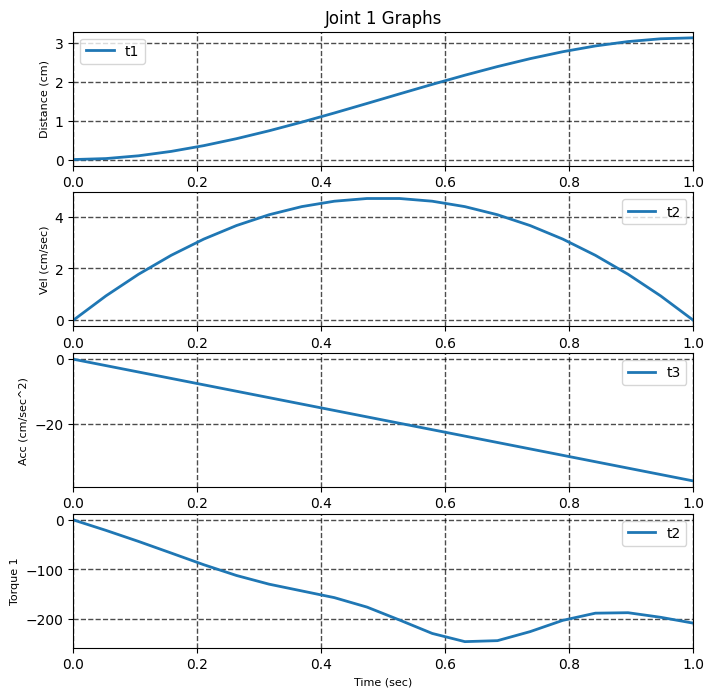

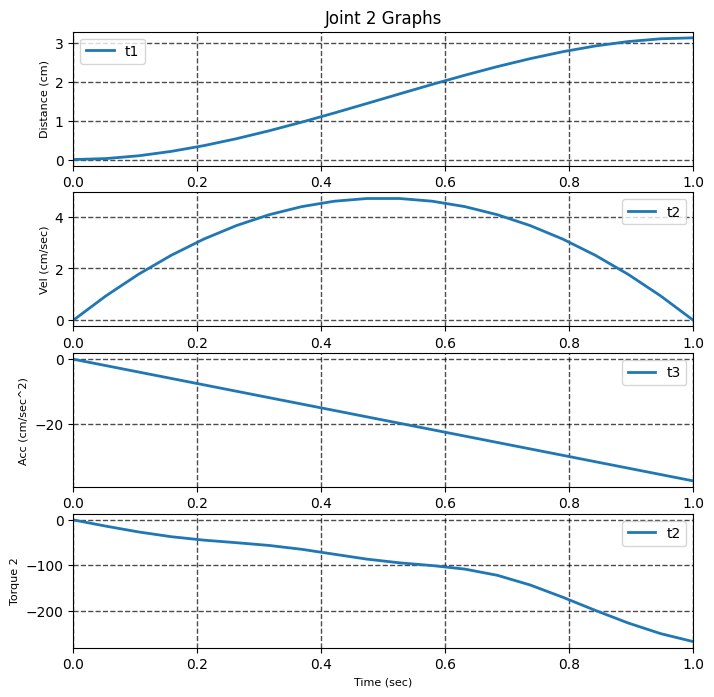

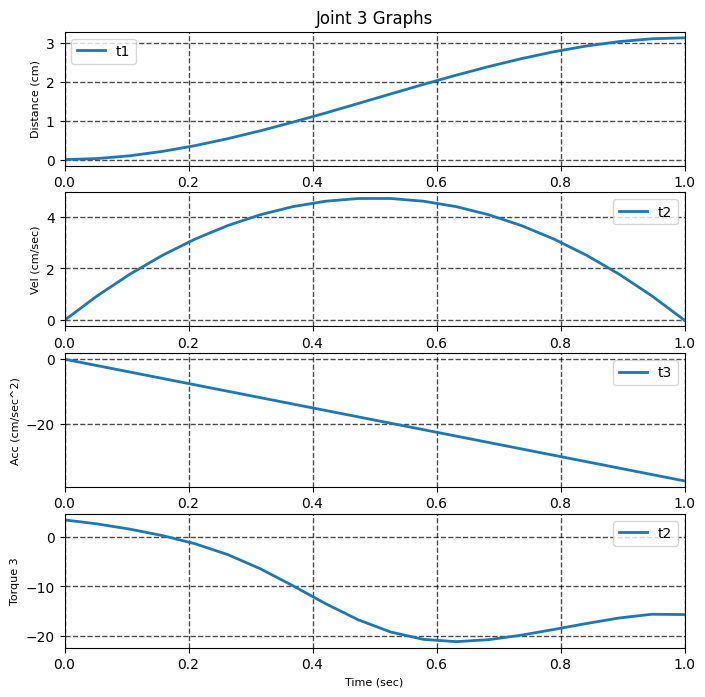

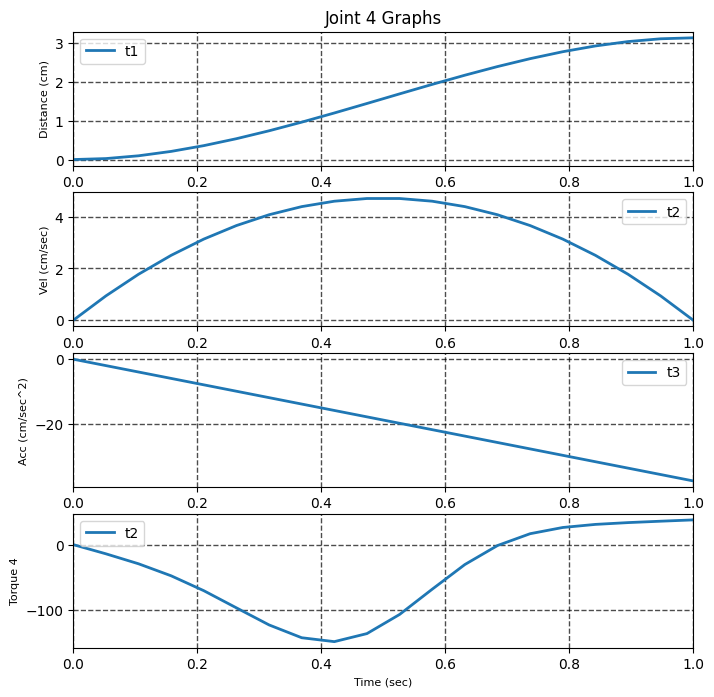

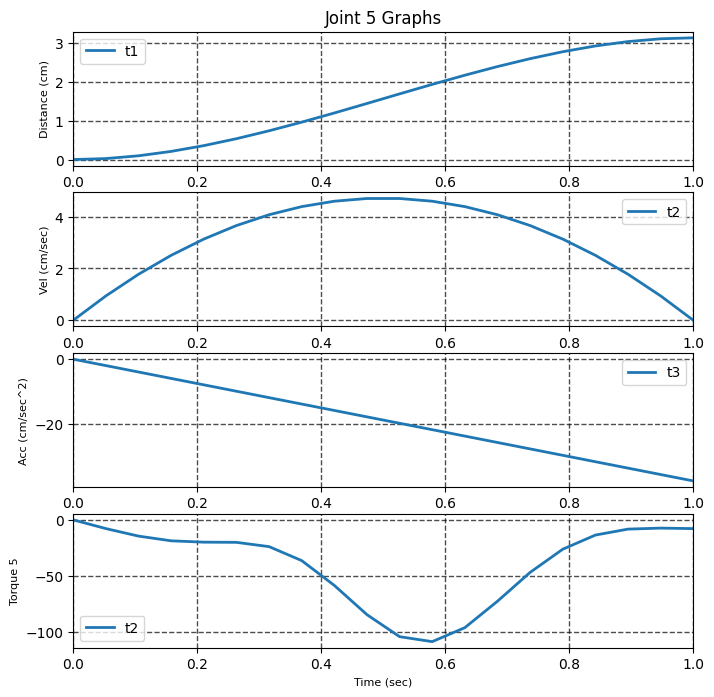

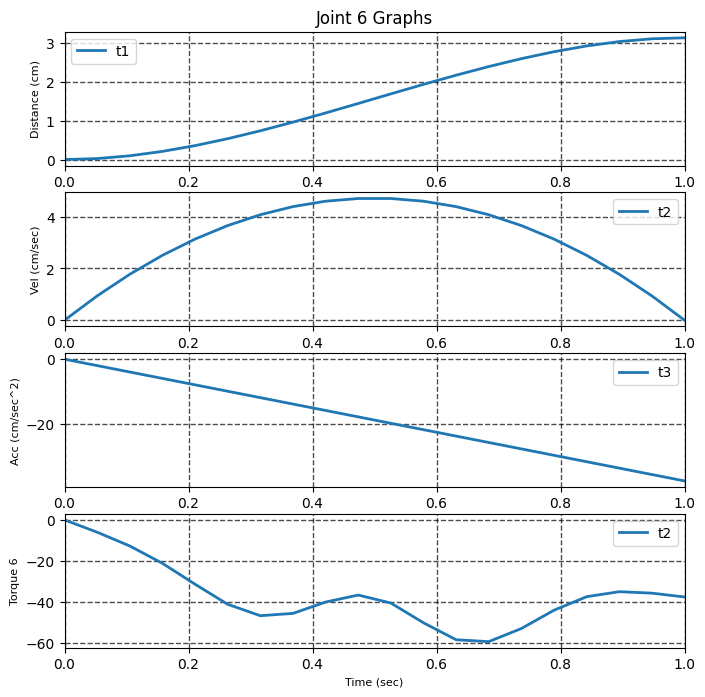

In [66]:
T1, T2, T3, T4, T5, T6 = plot_torque_time()

<hr>

# Part 2: Newton - Euler

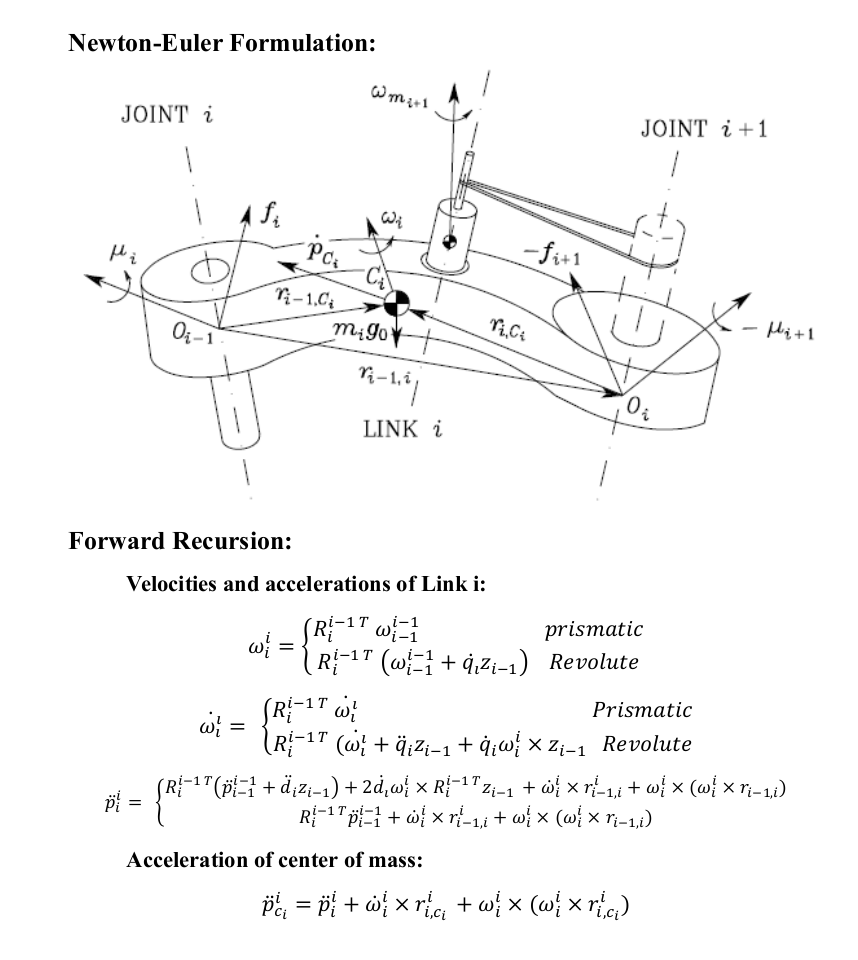

In [93]:
display.Image("screenshots/newton-euler1.png")

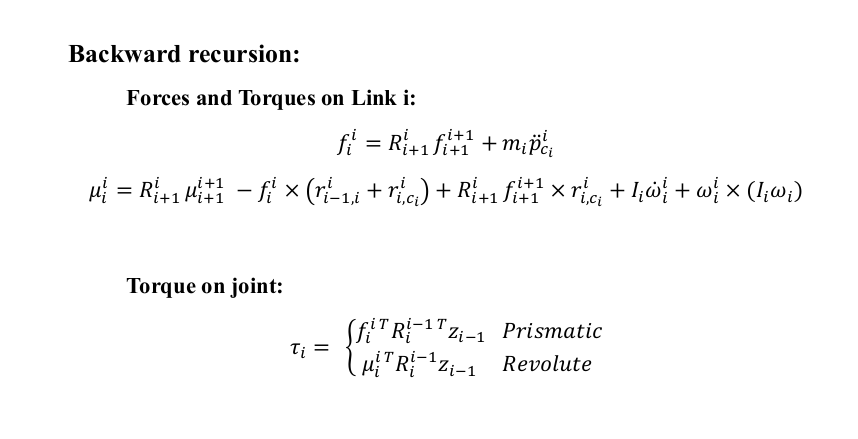

In [94]:
display.Image("screenshots/newton-euler2.png")

## 0. Rotation Matrices

In [69]:
from utils import forward2

In [70]:
t1 = pi/2  # Joint Angle 1
t2 = pi/2    # Joint Angle 2
t3 = 0      # Dummy variable for just sequence sake
t4 = pi/2   # Joint Angle 4
t5 = pi/2   # Joint Angle 5
t6 = pi/2   # Joint Angle 6

d1 = 0      # Dummy variable for just sequence sake
d2 = 1      # Link 2 Length
d3 = 1      # Prismatic Joint length + the Link 3 Length
d4 = 0      # Dummy variable for just sequence sake
d5 = 0      # Dummy variable for just sequence sake
d6 = 1      # Wrist to the end effector Length

setup_symbolic(symbol=True)

In [71]:
joint_params = [t1, t2, t3, t4, t5, t6]
t01, t12, t23, t34, t45, t56 = forward2(joint_params, d2, d6, symbolic=True)
t = [t01, t12, t23, t34, t45, t56]

In [72]:
R01 = t01[0:3, 0:3]
R12 = t12[0:3, 0:3]
R23 = t23[0:3, 0:3]
R34 = t34[0:3, 0:3]
R45 = t45[0:3, 0:3]
R56 = t56[0:3, 0:3]

In [73]:
R01

⎡cos(t₁)  -sin(t₁)  0⎤
⎢                    ⎥
⎢sin(t₁)  cos(t₁)   0⎥
⎢                    ⎥
⎣   0        0      1⎦

In [87]:
R12

⎡1     0        0    ⎤
⎢                    ⎥
⎢0  cos(t₂)  -sin(t₂)⎥
⎢                    ⎥
⎣0  sin(t₂)  cos(t₂) ⎦

In [88]:
R23

⎡1  0  0⎤
⎢       ⎥
⎢0  1  0⎥
⎢       ⎥
⎣0  0  1⎦

In [89]:
R34

⎡cos(t₄)  -sin(t₄)  0⎤
⎢                    ⎥
⎢sin(t₄)  cos(t₄)   0⎥
⎢                    ⎥
⎣   0        0      1⎦

In [90]:
R45

⎡1     0        0    ⎤
⎢                    ⎥
⎢0  cos(t₅)  -sin(t₅)⎥
⎢                    ⎥
⎣0  sin(t₅)  cos(t₅) ⎦

In [91]:
R56

⎡cos(t₆)  -sin(t₆)  0⎤
⎢                    ⎥
⎢sin(t₆)  cos(t₆)   0⎥
⎢                    ⎥
⎣   0        0      1⎦

<hr>

## 1. Initializing the values for centre distance, centre of mass of link, inertia matrix etc...

In [74]:
from sympy import eye

lc1=d1/2;      # Centre of link 1
lc2=d2/2;      # Centre of link 2
lc3=d3/2;      # Centre of link 3
lc4=d4/2;      # Centre of link 4
lc5=d5/2;      # Centre of link 5
lc6=d6/2;      # Centre of link 6

m1=0.1; m2=0.1; m3=0.1; m4=0.1; m5=0.1; m6=0.1;     # Mass of each link

I_1=eye(3); I_2=eye(3); I_3=eye(3); I_4=eye(3); I_5=eye(3); I_6=eye(3);  # Inertia matrices

g = 9.81    # Acceleration due to gravity

w_0 = zeros(3, 1)       # Initial Angular velocity
dw_0 = zeros(3, 1)      # Initial Angular acceleration
dq_1 = 0.1; dq_2 = 0.1; dq_3 = 0.1      # Joint velocities
dq_4 = 0.1; dq_5 = 0.1; dq_6 = 0.1
ddq_1 = 0.1; ddq_2 = 0.1; ddq_3 = 0.1;      # Joint accelerations
ddq_4 = 0.1; ddq_5 = 0.1; ddq_6 = 0.1;

ddp_0 = Matrix([[0], [0], [-g]])


<hr>

## 2. Forward and Backward Recursion

In [75]:
from newton_euler import w_i, dw_i, ddp_i, ddp_ci, forces_moments, torques_joint
# Forward Recursion
tau_1 = []; tau_2 = []; tau_3 = [];
tau_4 = []; tau_5 = []; tau_6 = [];

def forward_backward_recursion(D, V, A):
    global tau_1, tau_2, tau_3, tau_4, tau_5, tau_6
    tau_1 = []; tau_2 = []; tau_3 = [];
    tau_4 = []; tau_5 = []; tau_6 = [];
    for i in range(len(D)):
        t1, t2, t3, t4, t5, t6 = D[i], D[i], D[i], D[i], D[i], D[i]
        dq_1, dq_2, dq_3, dq_4, dq_5, dq_6 = V[i], V[i], V[i], V[i], V[i], V[i]
        ddq_1, ddq_2, ddq_3, ddq_4, ddq_5, ddq_6 = A[i], A[i], A[i], A[i], A[i], A[i]

        # Link 1
        u_0 = Matrix([[0], [0], [1]])
        r_c1 = Matrix([[0],[0],[lc1]])
        r_0_1 = Matrix([[0],[0],[d1]])

        w_1 = w_i('r', w_0, R01, dq_1, u_0)
        dw_1 = dw_i('r', w_0, dw_0, R01, dq_1, ddq_1, u_0)
        ddp_1 = ddp_i('r', R01, ddq_1, ddp_0, dq_1, w_1, dw_1, r_0_1, u_0)
        ddp_c1 = ddp_ci(ddp_1, dw_1, r_c1, w_1)


        # Link 2
        u_1 = Matrix([[1], [0], [0]])
        r_c2 = Matrix([[lc2], [0], [0]]) # Doubt
        r_1_2 = Matrix([[d2], [0], [0]])  # Doubt

        w_2 = w_i('r', w_1, R12, dq_2, u_1)
        dw_2 = dw_i('r', w_1, dw_1, R12, dq_2, ddq_2, u_1)
        ddp_2 = ddp_i('r', R12, ddq_2, ddp_1, dq_2, w_2, dw_2, r_1_2, u_1)
        ddp_c2 = ddp_ci(ddp_2, dw_2, r_c2, w_2)


        # Link 3
        u_2 = Matrix([[0], [0], [1]])
        r_c3 = Matrix([[0], [0], [lc3]]) # Doubt
        r_2_3 = Matrix([[0], [0], [d3]])  # Doubt

        w_3 = w_i('p', w_2, R23, dq_3, u_2)
        dw_3 = dw_i('p', w_2, dw_2, R23, dq_3, ddq_3, u_2)
        ddp_3 = ddp_i('p', R23, ddq_3, ddp_2, dq_3, w_3, dw_3, r_2_3, u_2)
        ddp_c3 = ddp_ci(ddp_3, dw_3, r_c3, w_3)


        # Link 4
        u_3 = Matrix([[0], [0], [1]])
        r_c4 = Matrix([[0], [0], [lc4]]) # Doubt
        r_3_4 = Matrix([[0], [0], [d4]])  # Doubt

        w_4 = w_i('r', w_3, R34, dq_4, u_3)
        dw_4 = dw_i('r', w_3, dw_3, R34, dq_4, ddq_4, u_3)
        ddp_4 = ddp_i('r', R34, ddq_4, ddp_3, dq_4, w_4, dw_4, r_3_4, u_3)
        ddp_c4 = ddp_ci(ddp_4, dw_4, r_c4, w_4)


        # Link 5
        u_4 = Matrix([[1], [0], [0]])
        r_c5 = Matrix([[lc5], [0], [0]]) # Doubt
        r_4_5 = Matrix([[d5], [0], [0]])  # Doubt

        w_5 = w_i('r', w_4, R45, dq_5, u_4)
        dw_5 = dw_i('r', w_4, dw_4, R45, dq_5, ddq_5, u_4)
        ddp_5 = ddp_i('r', R45, ddq_5, ddp_4, dq_5, w_5, dw_5, r_4_5, u_4)
        ddp_c5 = ddp_ci(ddp_5, dw_5, r_c5, w_5)


        # Link 6
        u_5 = Matrix([[0], [0], [1]])
        r_c6 = Matrix([[0], [0], [lc6]]) # Doubt
        r_5_6 = Matrix([[0], [0], [d6]])  # Doubt

        w_6 = w_i('r', w_5, R56, dq_6, u_5)
        dw_6 = dw_i('r', w_5, dw_5, R56, dq_6, ddq_6, u_5)
        ddp_6 = ddp_i('r', R56, ddq_6, ddp_5, dq_6, w_6, dw_6, r_5_6, u_5)
        ddp_c6 = ddp_ci(ddp_6, dw_6, r_c6, w_6)


        # Backward Recursion

        # Link 6
        R67 = eye(3)
        f_7 = zeros(3, 1)
        meu_7 = zeros(3, 1)
        fff = []
        f_6, meu_6 = forces_moments(R67, f_7, m6, ddp_c6, meu_7, r_5_6, r_c6, dw_6, I_6, w_6)
        tau_6.append(0 if eval(f"{torques_joint('r', f_6, R56, u_5, meu_6)}").values() == fff else eval(f"{torques_joint('r', f_6, R56, u_5, meu_6)}").values()[0])


        # Link 5
        f_5, meu_5 = forces_moments(R56, f_6, m5, ddp_c5, meu_6, r_4_5, r_c5, dw_5, I_5, w_5)
        tau_5.append(0 if eval(f"{torques_joint('r', f_5, R45, u_4, meu_5)}").values() == fff else eval(f"{torques_joint('r', f_5, R45, u_4, meu_5)}").values()[0])


        # Link 4
        f_4, meu_4 = forces_moments(R45, f_5, m4, ddp_c4, meu_5, r_3_4, r_c4, dw_4, I_4, w_4)
        tau_4.append(0 if eval(f"{torques_joint('r', f_4, R34, u_3, meu_4)}").values() == fff else eval(f"{torques_joint('r', f_4, R34, u_3, meu_4)}").values()[0])


        # Link 3
        f_3, meu_3 = forces_moments(R34, f_4, m3, ddp_c3, meu_4, r_2_3, r_c3, dw_3, I_3, w_3)
        tau_3.append(0 if eval(f"{torques_joint('p', f_3, R23, u_2, meu_3)}").values() == fff else eval(f"{torques_joint('p', f_3, R23, u_2, meu_3)}").values()[0])


        # Link 2
        f_2, meu_2 = forces_moments(R23, f_3, m2, ddp_c2, meu_3, r_1_2, r_c2, dw_2, I_2, w_2)
        tau_2.append(0 if eval(f"{torques_joint('r', f_2, R12, u_1, meu_2)}").values() == fff else eval(f"{torques_joint('r', f_2, R12, u_1, meu_2)}").values()[0])


        # Link 1
        f_1, meu_1 = forces_moments(R12, f_2, m1, ddp_c1, meu_2, r_0_1, r_c1, dw_1, I_1, w_1)
        tau_1.append(0 if eval(f"{torques_joint('r', f_1, R01, u_0, meu_1)}").values() == fff else eval(f"{torques_joint('r', f_1, R01, u_0, meu_1)}").values()[0])

In [76]:
forward_backward_recursion(D, V, A)

<hr>

## 3. Plot Torques - Newton Euler

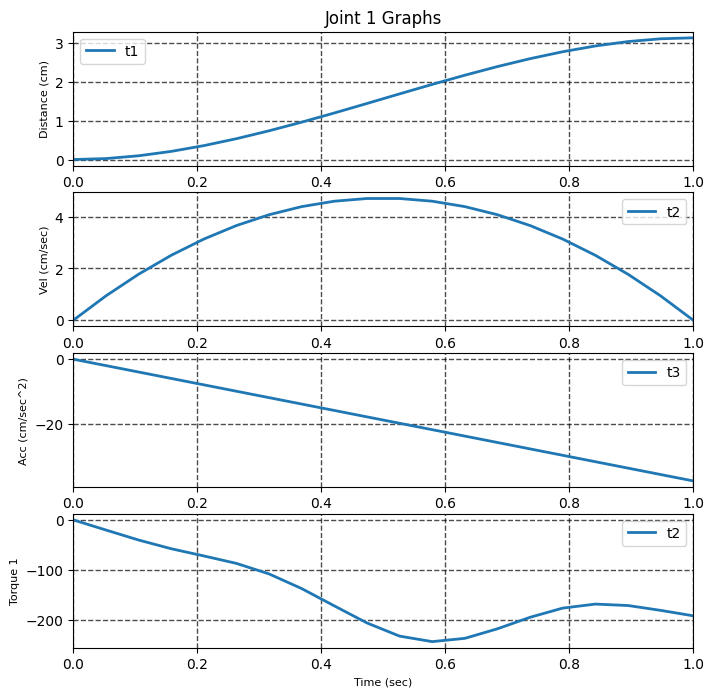

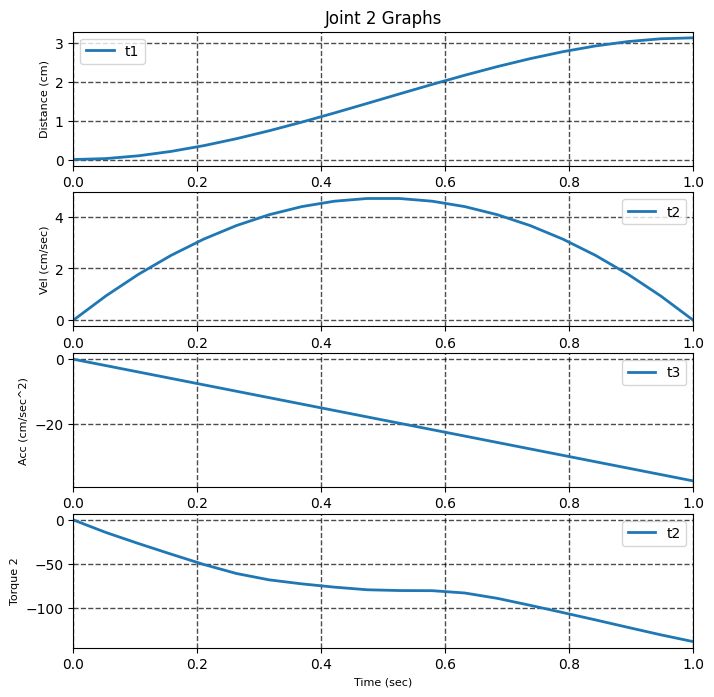

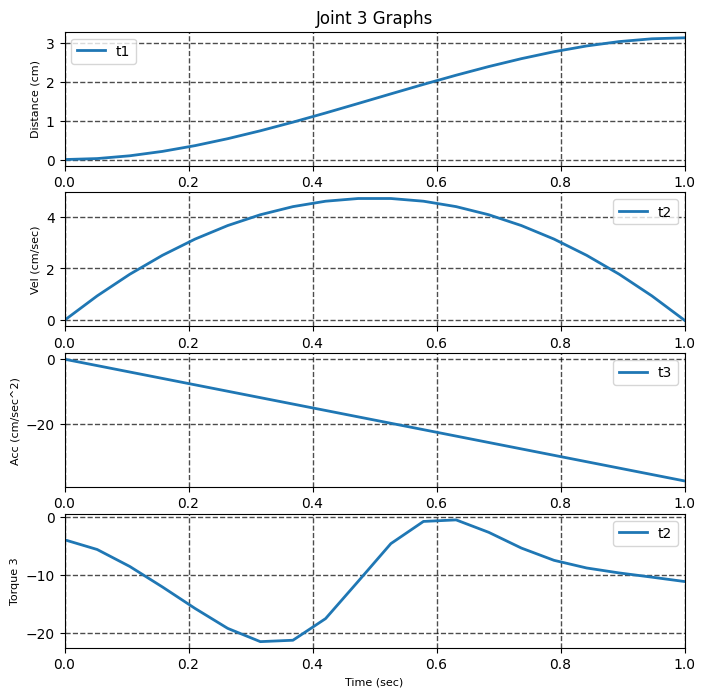

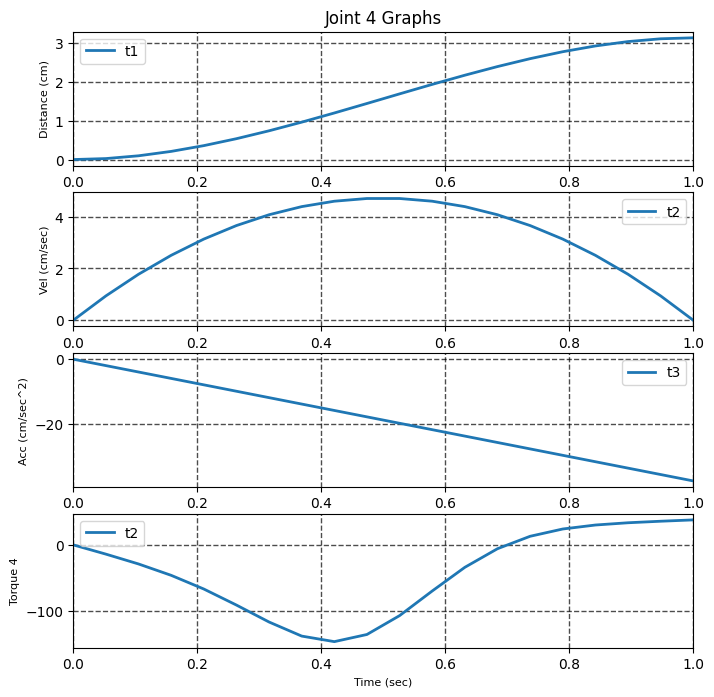

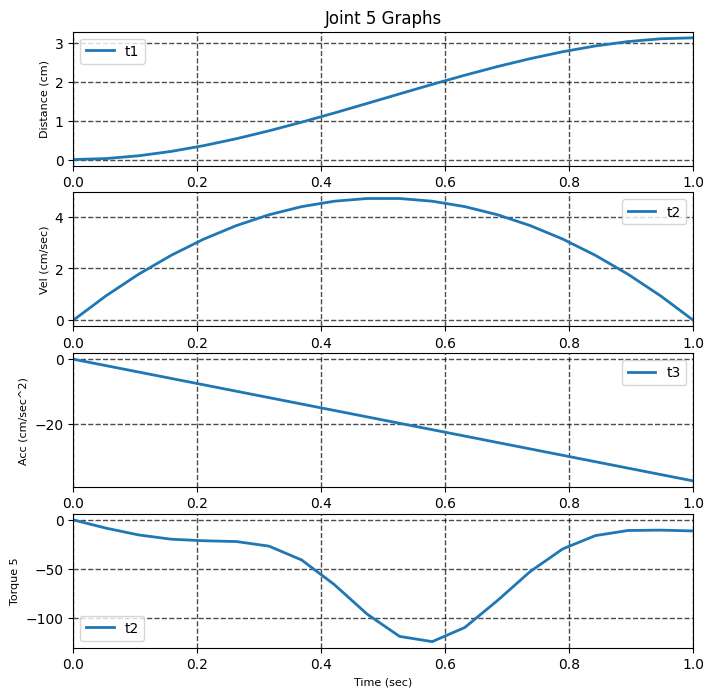

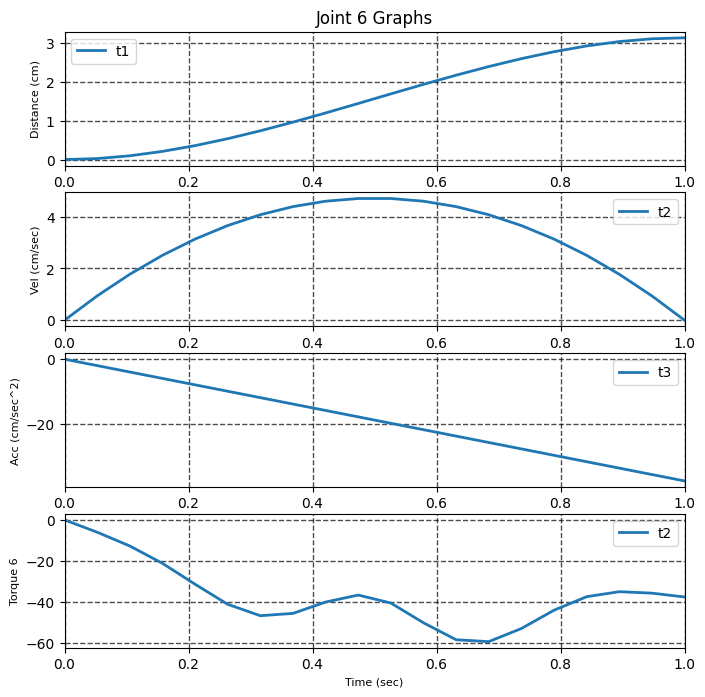

In [77]:
tf = 1
time = np.linspace(0, tf, 20)
plot_dva(D, V, A, tau_1, tf, time, joint_number=1)  # Joint 1 Torque Graph
plot_dva(D, V, A, tau_2, tf, time, joint_number=2)  # Joint 2 Torque Graph
plot_dva(D, V, A, tau_3, tf, time, joint_number=3)  # Joint 3 Torque Graph
plot_dva(D, V, A, tau_4, tf, time, joint_number=4)  # Joint 4 Torque Graph
plot_dva(D, V, A, tau_5, tf, time, joint_number=5)  # Joint 5 Torque Graph
plot_dva(D, V, A, tau_6, tf, time, joint_number=6)  # Joint 6 Torque Graph


# Bonus Task

<hr>

## 1. Plot Torques for Trapezoidal Trajectories

In [78]:
from trajectory_planning import *

In [79]:
j1 = [0, pi, 2, 2]      # Joint 1 = [q0, qf, velocity_max, acceleration_max]
j2 = [0, pi, 2, 2]      # Joint 2 = [q0, qf, velocity_max, acceleration_max]
j3 = [0, pi, 2, 2]      # Joint 3 = [q0, qf, velocity_max, acceleration_max]
j4 = [0, pi, 2, 2]      # Joint 4 = [q0, qf, velocity_max, acceleration_max]
j5 = [0, pi, 2, 2]      # Joint 5 = [q0, qf, velocity_max, acceleration_max]
j6 = [0, pi, 2, 2]      # Joint 6 = [q0, qf, velocity_max, acceleration_max]

j = [j1, j2, j3, j4, j5, j6]

j, times = get_times_trajectory(j)
j = synchronize_trajectories(j)
time_intervals, q, v, a, j = plan_trajectories(j)
#plot_trajectories(time_intervals, q, v, a, j, titlel='Bonus Task-1 Synchronized Trajectories')


For Joint 1 : tb = 1.00,  tf-tb = 1.57,  tf = 2.57
For Joint 2 : tb = 1.00,  tf-tb = 1.57,  tf = 2.57
For Joint 3 : tb = 1.00,  tf-tb = 1.57,  tf = 2.57
For Joint 4 : tb = 1.00,  tf-tb = 1.57,  tf = 2.57
For Joint 5 : tb = 1.00,  tf-tb = 1.57,  tf = 2.57
For Joint 6 : tb = 1.00,  tf-tb = 1.57,  tf = 2.57

Joint 1 rise time : 1.00
Joint 2 rise time : 1.00
Joint 3 rise time : 1.00
Joint 4 rise time : 1.00
Joint 5 rise time : 1.00
Joint 6 rise time : 1.00
Synced rise time : 1.00

Joint 1 dwell time : 0.57
Joint 2 dwell time : 0.57
Joint 3 dwell time : 0.57
Joint 4 dwell time : 0.57
Joint 5 dwell time : 0.57
Joint 6 dwell time : 0.57
Synced dwell time : 0.57

Synchronized trajectory time = 1.00 + 0.57 + 1.00 = 2.57 sec

Joint 1 velocity modified from 5.00 to 2.00 and acceleration from 1.98 to 2.00
Joint 2 velocity modified from 5.00 to 2.00 and acceleration from 1.98 to 2.00
Joint 3 velocity modified from 5.00 to 2.00 and acceleration from 1.98 to 2.00
Joint 4 velocity modified from 5.00 t

In [80]:
forward_backward_recursion(q[0], v[0], a[0])    # Perform the Newton-Euler and fet the updated Torque values

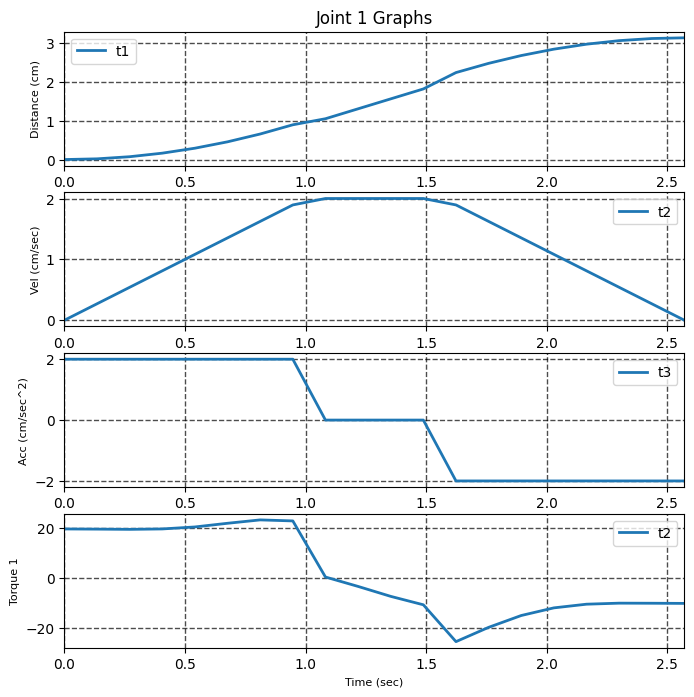

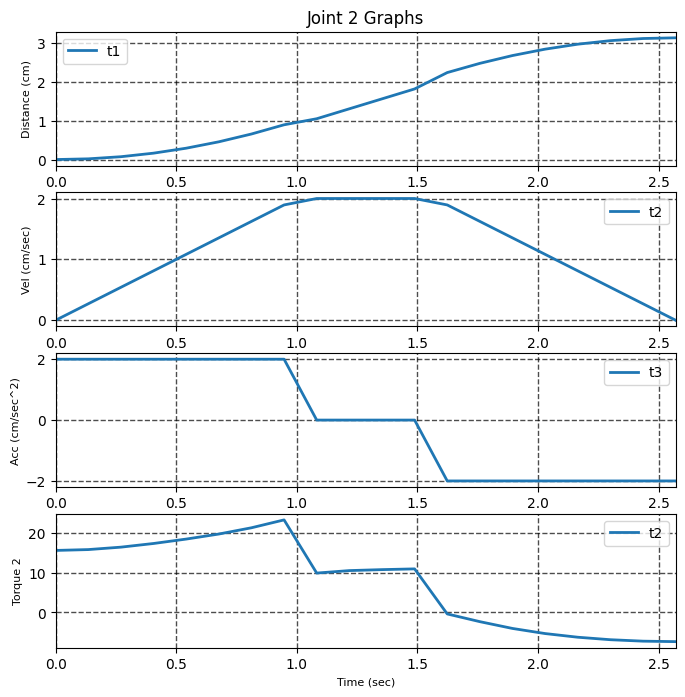

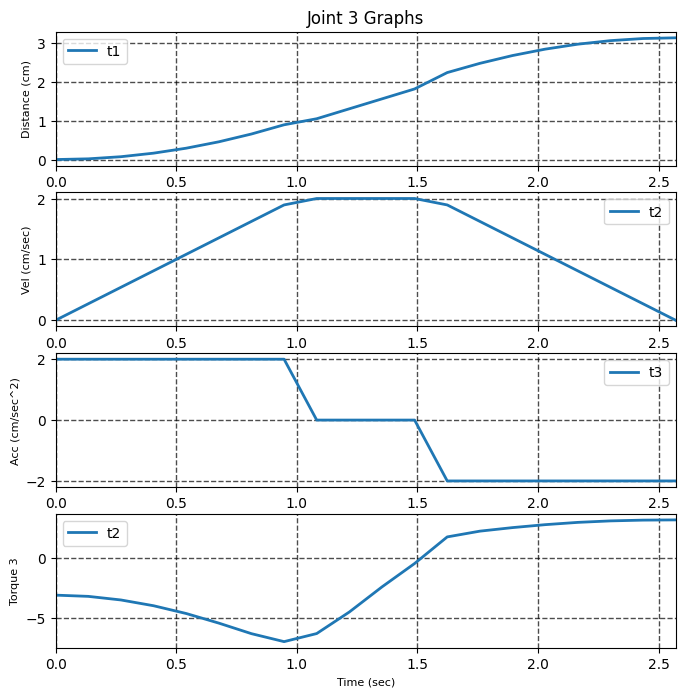

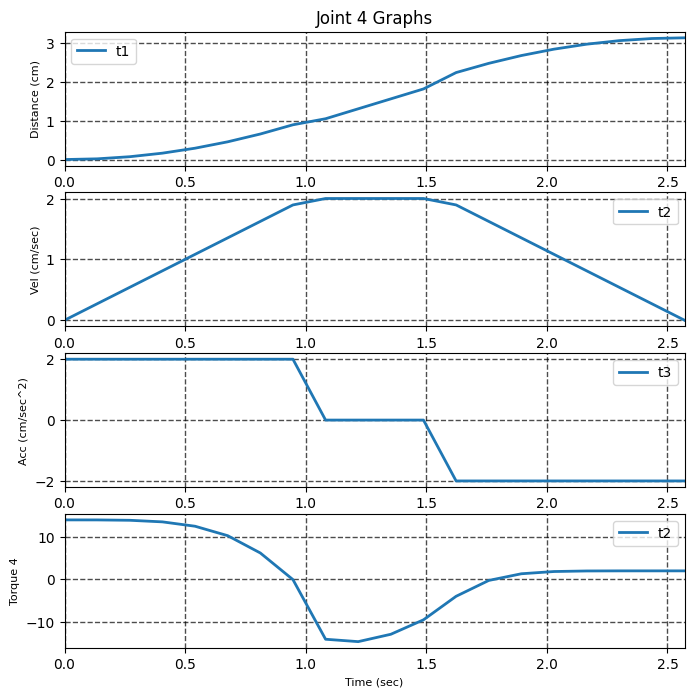

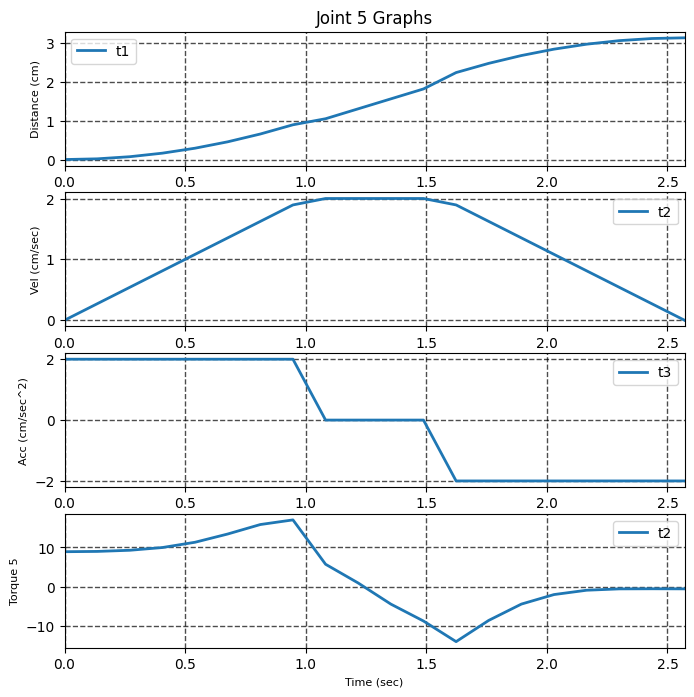

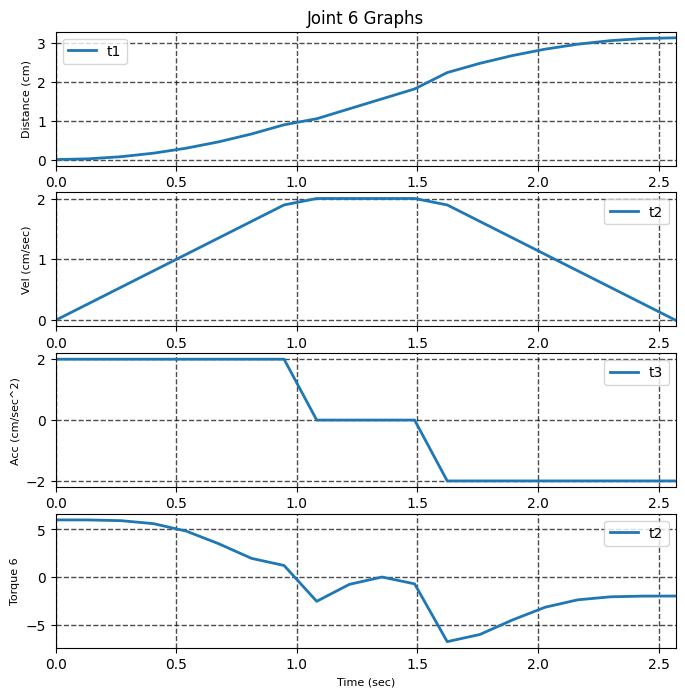

In [81]:
tf = 1
time = np.linspace(0, tf, 20)
plot_dva(q[0], v[0], a[0], tau_1, j[0][T_F], time_intervals[0], joint_number=1)  # Joint 1 Torque Graph
plot_dva(q[1], v[1], a[1], tau_2, j[1][T_F], time_intervals[1], joint_number=2)  # Joint 2 Torque Graph
plot_dva(q[2], v[2], a[2], tau_3, j[2][T_F], time_intervals[2], joint_number=3)  # Joint 3 Torque Graph
plot_dva(q[3], v[3], a[3], tau_4, j[3][T_F], time_intervals[3], joint_number=4)  # Joint 4 Torque Graph
plot_dva(q[4], v[4], a[4], tau_5, j[4][T_F], time_intervals[4], joint_number=5)  # Joint 5 Torque Graph
plot_dva(q[5], v[5], a[5], tau_6, j[5][T_F], time_intervals[5], joint_number=6)  # Joint 6 Torque Graph

In [82]:
def plan_plot_polynomial(j_1, tif, titlel='Plot'):
    ax = [[0.0]]*len(j_1)
    for joint in range(len(j_1)):
        Q = Matrix([[j_1[joint][0]],
                    [j_1[joint][1]],
                    [j_1[joint][2]],
                    [j_1[joint][3]],
                    [j_1[joint][4]],
                    [j_1[joint][5]]])
        t0 = tif[joint][0]
        tf = tif[joint][1]
        M = Matrix([[t0 ** 5,       t0 ** 4,      t0 ** 3,     t0 ** 2,     t0 ** 1,    1],
                    [tf ** 5,       tf ** 4,      tf ** 3,     tf ** 2,     tf ** 1,    1],
                    [5 * t0 ** 4,   4 * t0 ** 3,  3 * t0 ** 2, 2 * t0 ** 1, 1,          0],
                    [5 * tf ** 4,   4 * tf ** 3,  3 * tf ** 2, 2 * tf ** 1, 1,          0],
                    [20 * t0 ** 3,  12 * t0 ** 2, 6 * t0 ** 1, 2,           0,          0],
                    [20 * tf ** 3,  12 * tf ** 2, 6 * tf ** 1, 2,           0,          0]])
        A_vals =  M.inv() * Q
        ax[joint] = A_vals.tolist()
        print(f"For Joint {joint+1} a5, a4, a3, a2, a1, a0 are : {A_vals.tolist()}")

    q.clear()
    v.clear()
    a.clear()
    time_stamp = 0
    time_intervals.clear()
    #print(ax[0][0][0])
    for joint in range(len(j_1)):
        time_stamp = np.linspace(0, tif[joint][1], 20)
        time_intervals.append(list(time_stamp))
        for t in time_stamp:
            qi = ax[joint][0][0]*t**5 + ax[joint][1][0]*t**4 + ax[joint][2][0]*t**3 + ax[joint][3][0]*t**2 + ax[joint][4][0]*t + ax[joint][5][0]
            vi = 5*ax[joint][0][0]*t**4 + 4*ax[joint][1][0]*t**3 + 3*ax[joint][2][0]*t**2 + 2*ax[joint][3][0]*t + ax[joint][4][0]
            ai = 20*ax[joint][0][0]*t**3 + 12*ax[joint][1][0]*t**2 + 6*ax[joint][2][0]*t + 2*ax[joint][3][0]
            bq.append(qi)
            bv.append(vi)
            ba.append(ai)
        q.append(bq.copy())
        v.append(bv.copy())
        a.append(ba.copy())
        bq.clear()
        bv.clear()
        ba.clear()

    return q, v, a

In [83]:
j1 = [0, pi, 0, 0.1, 0, 0.2]      # Joint 1 = [q0, qf, v0, vf, a0, af]
j2 = [0, pi, 0, 0.1, 0, 0.2]      # Joint 2 = [q0, qf, v0, vf, a0, af]
j3 = [0, pi, 0, 0.1, 0, 0.2]      # Joint 3 = [q0, qf, v0, vf, a0, af]
j4 = [0, pi, 0, 0.1, 0, 0.2]      # Joint 4 = [q0, qf, v0, vf, a0, af]
j5 = [0, pi, 0, 0.1, 0, 0.2]      # Joint 5 = [q0, qf, v0, vf, a0, af]
j6 = [0, pi, 0, 0.1, 0, 0.2]      # Joint 6 = [q0, qf, v0, vf, a0, af]

j_1 = [j1, j2, j3, j4, j5, j6]
tif = [[0, 1]] * 6
q, v, a = plan_plot_polynomial(j_1, tif, titlel='Bonus Task-2 Polynomial Trajectory for 2 points for 6 Joints')

For Joint 1 a5, a4, a3, a2, a1, a0 are : [[18.6495559215388], [-46.6238898038469], [31.1159265358979], [0], [0], [0]]
For Joint 2 a5, a4, a3, a2, a1, a0 are : [[18.6495559215388], [-46.6238898038469], [31.1159265358979], [0], [0], [0]]
For Joint 3 a5, a4, a3, a2, a1, a0 are : [[18.6495559215388], [-46.6238898038469], [31.1159265358979], [0], [0], [0]]
For Joint 4 a5, a4, a3, a2, a1, a0 are : [[18.6495559215388], [-46.6238898038469], [31.1159265358979], [0], [0], [0]]
For Joint 5 a5, a4, a3, a2, a1, a0 are : [[18.6495559215388], [-46.6238898038469], [31.1159265358979], [0], [0], [0]]
For Joint 6 a5, a4, a3, a2, a1, a0 are : [[18.6495559215388], [-46.6238898038469], [31.1159265358979], [0], [0], [0]]


<hr>

## 2. Plot Torques for Ploynomial Trajectories

In [84]:
from sympy import sin, cos

In [85]:
forward_backward_recursion(q[0], v[0], a[0])    # Perform the Newton-Euler and fet the updated Torque values

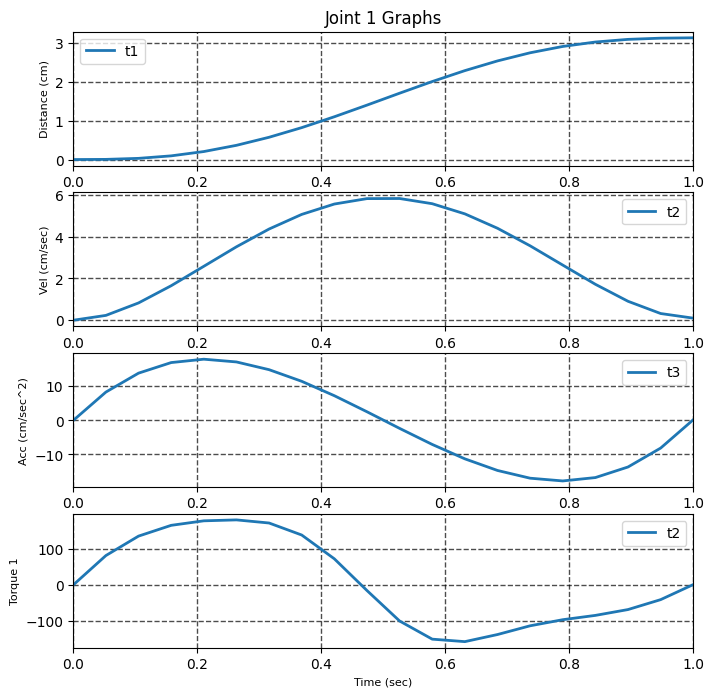

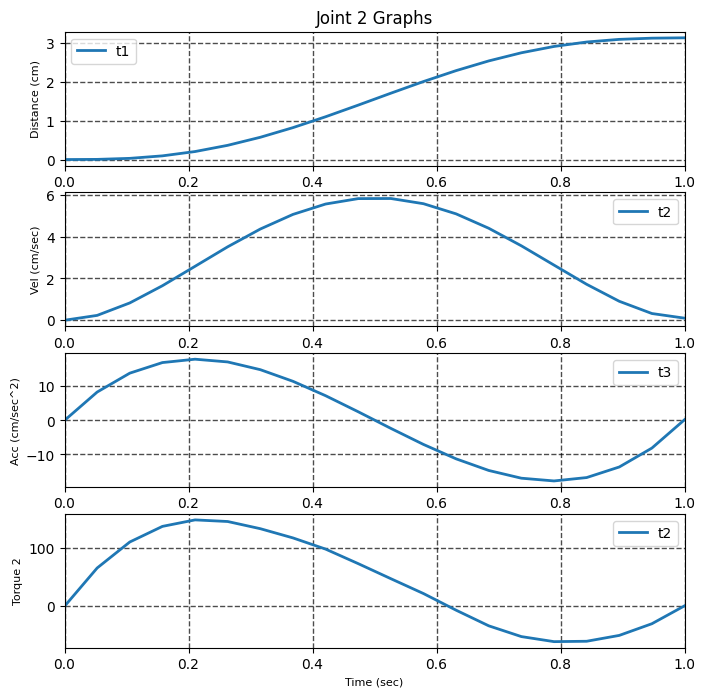

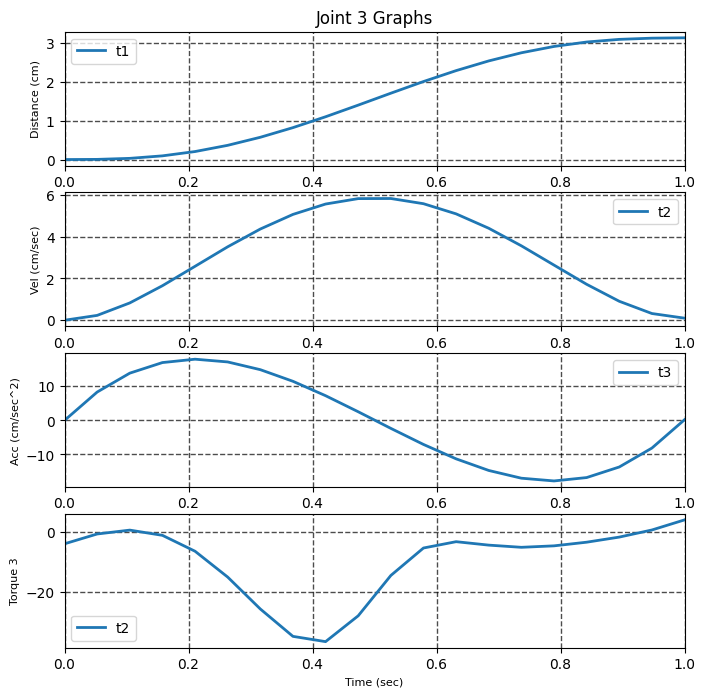

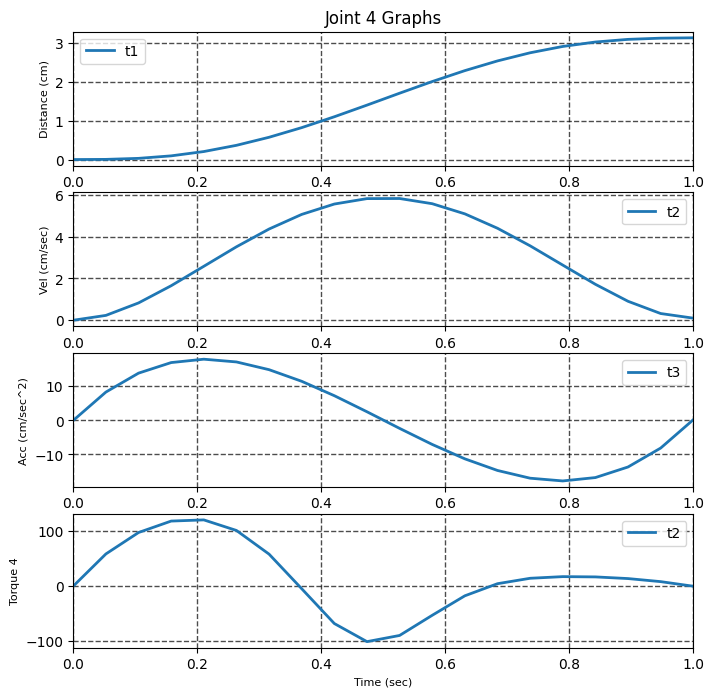

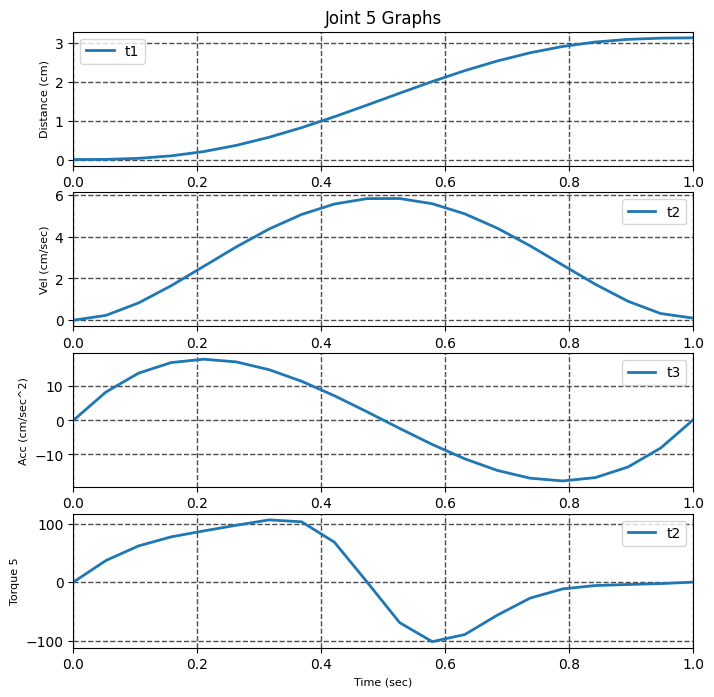

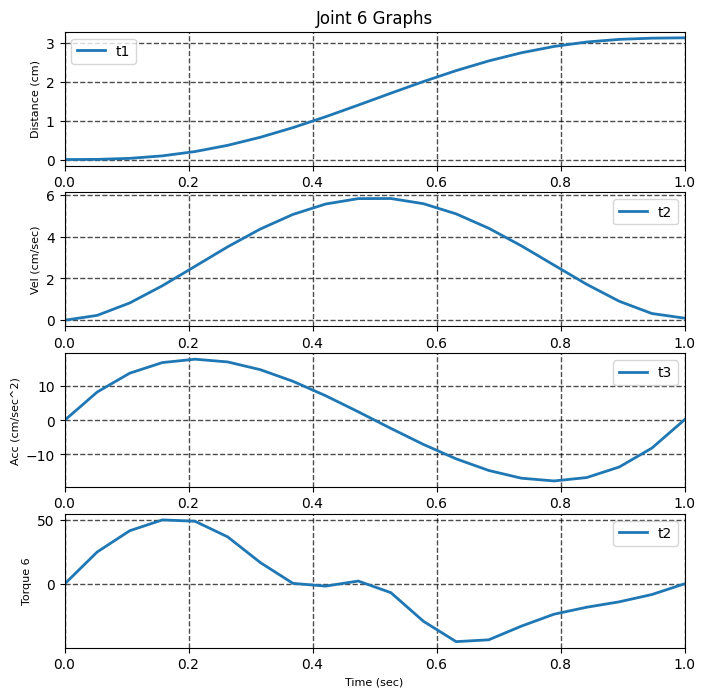

In [86]:
tf = 1
time = np.linspace(0, tf, 20)
plot_dva(q[0], v[0], a[0], tau_1, tf, time, joint_number=1)  # Joint 1 Torque Graph
plot_dva(q[1], v[1], a[1], tau_2, tf, time, joint_number=2)  # Joint 2 Torque Graph
plot_dva(q[2], v[2], a[2], tau_3, tf, time, joint_number=3)  # Joint 3 Torque Graph
plot_dva(q[3], v[3], a[3], tau_4, tf, time, joint_number=4)  # Joint 4 Torque Graph
plot_dva(q[4], v[4], a[4], tau_5, tf, time, joint_number=5)  # Joint 5 Torque Graph
plot_dva(q[5], v[5], a[5], tau_6, tf, time, joint_number=6)  # Joint 6 Torque Graph

<hr>

## 3. Conclusion from the torque plots

```
We can conclude from the bonus tasks that the Torque graphs follows the Acceleration graphs,
In fact it makes sense as the Forces are dependent on the acceleration i.e. F = ma
```

## Thank you :)